## 1. Project Title: Machine Learning for Jewellery Price Optimization

This project aims to successfully predict the prices of jewellery pieces. This will allow the jewellery company to reduce its dependence on gemologists and expensive jewellery appraisal experts.

## 2. Methodology

This project will be carried out using the CRISP-DM (Cross Industry Standard Process for Data Mining) methodology. 
This is one of the most popular data science methodologies and is characterized by six important phases, which are as follows:
    
1. Business Understanding
2. Data Understanding
3. Data Preparation
4. Data Modelling
5. Model Evaluation
6. Model Deployment

It should be noted that these phases are usually recurrent in nature i.e some phases may be repeated. 
As such they do not really follow a linear progression.

## 3. Tools

The tools of use for this project include:

1. Pandas - A python library built upon the Numpy library. Useful in Data wrangling and manipulation
2. Numpy - Usedin numerical operations
3. Matplotlib and Seaborn - Python libraries for train visualization. Other alternatives are Bokeh and Plotly
4. Sci-kit learn - Used extensively for Machine Learning.

# Project implementation using CRISP-DM

## Business Understanding

Gemineye Emporium is an expanding jewelery dealer. The firm has recently begun a new wave of expansion acros the country.
While this should be good for business, it also comes with increased costs and the need for increased operational efficiency.

One such area is the need to accurately price their jewelery products. A t present, their jewelery items are being priced by gemologists and appraisal experts.
However, this process can be quite a lengthy one, not to mention expensive, as most gemologists are well-sought and expensive to call upon. Gemineye would loveto explore the use
of machine learning for predicting the optimal prices at which their jewelery should be sold. Utilizing ML for this task would allow the company:

    1. improve the speed and scalability of their pricing process and
    2. cut down on the costs of hiring gem experts.

## Data Understanding

With the business understanding out of the way, the next step is to understand the data to be obtained and used for the task. This will involve the process of ExploratoryData Analysis(EDA).

EDA is the process of sifting through data with the goal of extracting insights. These insights allow a better understanding of the available data and what can be done with it.
They can also be used for guided preparation of the dataset in the appropriate manner. Just like regular analysis, EDA begins with a set of questions and/or hypotheses. The EDA process will then prove or disprove these hypotheses,
and hopefully reveal other points of inquiry along the way.

The required libraries and packages are imported first. The EDA process is carried out next. The high-level steps are as follows:
    
    1. Import the required libraries
    2. Load in the dataset
    3. Analyze and observe its properties.
       * Missing data 
       * Outliers
       * Inconsistent values
       * Low categorical cardinality
       * Data imbalance
       * Feature correlations
    4. Report on these properties and how they might affect our final solution.


In [1]:
### Import the libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# Set visualization theme
sns.set()

In [2]:
### Import the dataset

data = pd.read_csv("Jewelry_Dataset.csv")

data.columns = [
    "Order_Datetime",
    "Order_ID",
    "Product_ID",
    "SKU_Quantity",
    "Category_ID",
    "Category",
    "Brand_ID",
    "Price_USD",
    "User_ID",
    "Target_Gender",
    "Main_Color",
    "Main_Metal",
    "Main_Gem",
]


In [3]:
### Peek the data
data.head()

Order_Datetime             Order_ID           Product_ID  \
0  2018-12-01 17:38:31 UTC  1924899396621697920  1806829193678291446   
1  2018-12-02 13:53:42 UTC  1925511016616034733  1842214461889315556   
2  2018-12-02 17:44:02 UTC  1925626951238681511  1835566849434059453   
3  2018-12-02 21:30:19 UTC  1925740842841014667  1873936840742928865   
4  2018-12-02 22:09:34 UTC  1925760595336888995  1835566854827934449   

   SKU_Quantity   Category_ID          Category  Brand_ID  Price_USD  \
0             1  1.806829e+18               NaN       NaN     212.14   
1             1  1.806829e+18   jewelry.pendant       1.0      54.66   
2             1  1.806829e+18   jewelry.pendant       0.0      88.90   
3             1  1.806829e+18  jewelry.necklace       0.0     417.67   
4             1  1.806829e+18   jewelry.earring       1.0     102.27   

        User_ID Target_Gender Main_Color Main_Metal  Main_Gem  
0  1.515916e+18           NaN     yellow       gold       NaN  
1  1.515916e+18             f      white       gold  sapphire  
2  1.515916e+18             f        red       gold   diamond  
3  1.515916e+18           NaN        red       gold  amethyst  
4  1.515916e+18           NaN        red       gold       NaN

In [4]:
data.shape

(95910, 13)

In [5]:
### check for Missing values
data.isnull().sum()

Order_Datetime        0
Order_ID              0
Product_ID            0
SKU_Quantity          0
Category_ID        5352
Category           9933
Brand_ID           4785
Price_USD          5352
User_ID            5352
Target_Gender     48167
Main_Color         7660
Main_Metal         5462
Main_Gem          34058
dtype: int64

In [6]:
### Feature cardinality
data.nunique()

Order_Datetime    74504
Order_ID          74759
Product_ID         9613
SKU_Quantity          1
Category_ID          25
Category            218
Brand_ID           2537
Price_USD          3166
User_ID           31079
Target_Gender         2
Main_Color            5
Main_Metal            3
Main_Gem             30
dtype: int64

In [7]:
### Data description

data.describe()

Order_ID    Product_ID  SKU_Quantity   Category_ID      Brand_ID  \
count  9.591000e+04  9.591000e+04       95910.0  9.055800e+04  9.112500e+04   
mean   2.485191e+18  1.815970e+18           1.0  1.805947e+18  8.891036e+16   
std    1.934750e+17  2.136814e+17           0.0  2.083954e+16  3.559651e+17   
min    1.924899e+18  1.313551e+18           1.0  1.313678e+18  0.000000e+00   
25%    2.379732e+18  1.515966e+18           1.0  1.806829e+18  0.000000e+00   
50%    2.524282e+18  1.956664e+18           1.0  1.806829e+18  1.000000e+00   
75%    2.644347e+18  1.956664e+18           1.0  1.806829e+18  1.000000e+00   
max    2.719022e+18  2.541962e+18           1.0  1.806829e+18  1.550613e+18   

          Price_USD       User_ID  
count  90558.000000  9.055800e+04  
mean     362.213017  1.512644e+18  
std      444.157665  2.374776e+16  
min        0.990000  1.313554e+18  
25%      145.620000  1.515916e+18  
50%      258.770000  1.515916e+18  
75%      431.370000  1.515916e+18  
max    34448.600000  1.554297e+18

In [8]:
#Data Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95910 entries, 0 to 95909
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order_Datetime  95910 non-null  object 
 1   Order_ID        95910 non-null  int64  
 2   Product_ID      95910 non-null  int64  
 3   SKU_Quantity    95910 non-null  int64  
 4   Category_ID     90558 non-null  float64
 5   Category        85977 non-null  object 
 6   Brand_ID        91125 non-null  float64
 7   Price_USD       90558 non-null  float64
 8   User_ID         90558 non-null  float64
 9   Target_Gender   47743 non-null  object 
 10  Main_Color      88250 non-null  object 
 11  Main_Metal      90448 non-null  object 
 12  Main_Gem        61852 non-null  object 
dtypes: float64(4), int64(3), object(6)
memory usage: 9.5+ MB


In [9]:
#Duplicate Values
num_duplicated = data.duplicated().sum()
num_duplicated

2589

In [10]:
#Features with a cardinality of 1
invariant_features = data.nunique()[data.nunique()==1].index.tolist()
invariant_features

['SKU_Quantity']

In [11]:
# Check for label distribution
data['Price_USD'].skew()

18.95906072625981

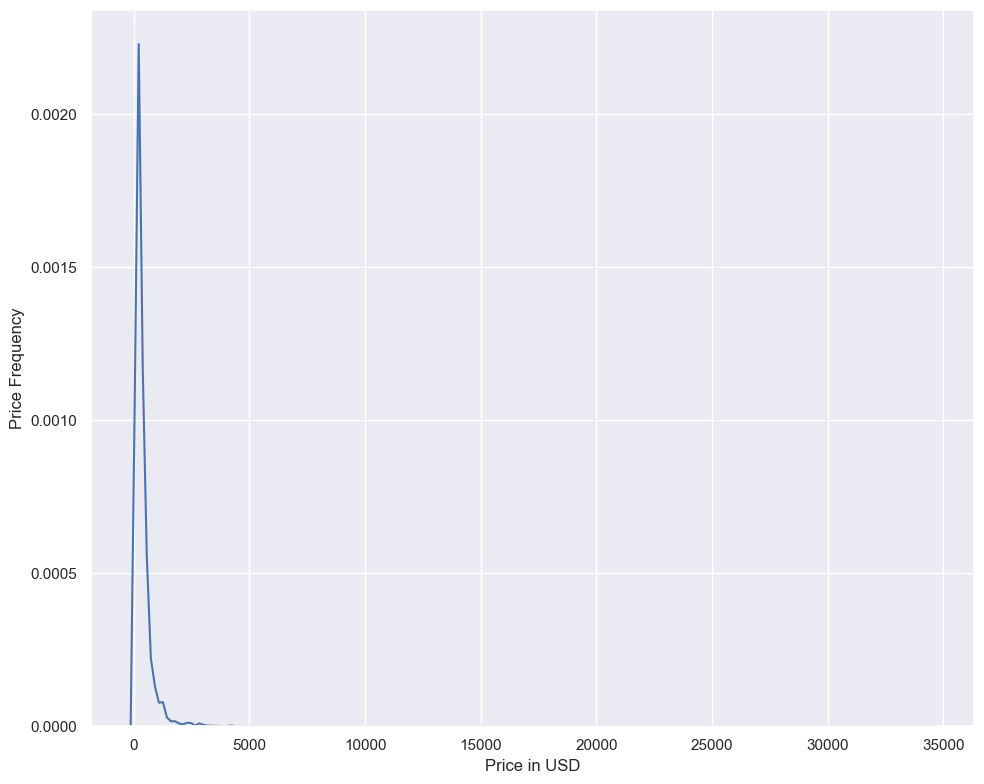

In [12]:
# Visualize price distribution
plt.figure(figsize =(10,8))

sns.kdeplot(data=data, x = "Price_USD")
plt.xlabel("Price in USD")
plt.ylabel("Price Frequency")

plt.tight_layout()
plt.show();
plt.close()

Our data is positively skewed. The majority of the data points fall on the left side of the graph, with a longer tail stretching out towards the right side. This means that the  mean will be greater than the median in a positively skewed distribution.
Most prices might fall in the middle range, with a smaller number of prices that could be from very wealthy individuals on the far right side (high earners).

In [13]:
data['Price_USD'].kurtosis()

1054.8979068506155

In [14]:
#Target Gender analysis
data["Target_Gender"].value_counts()

f    47379
m      364
Name: Target_Gender, dtype: int64

In [15]:
#Target Gender analysis
data["Target_Gender"].value_counts(normalize = True)

f    0.992376
m    0.007624
Name: Target_Gender, dtype: float64

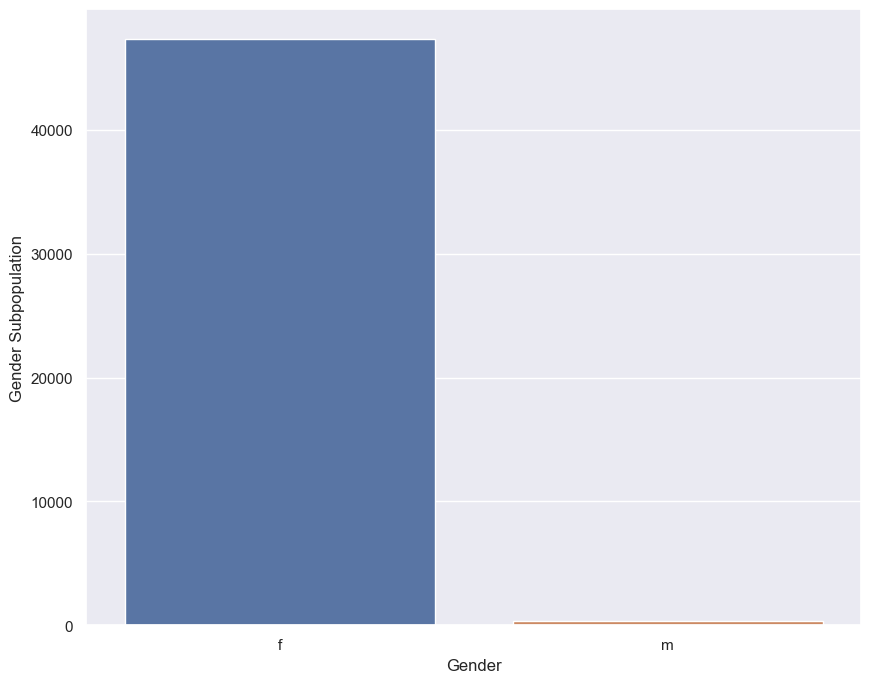

In [16]:
# Visualize Target Gender 
plt.figure(figsize = (10,8))

sns.countplot(data=data ,x = "Target_Gender")

plt.xlabel("Gender")
plt.ylabel("Gender Subpopulation")

plt.show();
plt.close()

In [17]:
#Jewelry category analysis
data['Category'].value_counts()

jewelry.earring     29051
jewelry.ring        28300
jewelry.pendant     13088
jewelry.bracelet     6188
0.00                 4392
                    ...  
626.58                  1
13.42                   1
2.88                    1
101.23                  1
253.77                  1
Name: Category, Length: 218, dtype: int64

In [18]:
data['Category'].unique()

array([nan, 'jewelry.pendant', 'jewelry.necklace', 'jewelry.earring',
       'jewelry.ring', 'jewelry.brooch', 'jewelry.bracelet',
       'electronics.clocks', 'jewelry.souvenir', '230.12', '202.36',
       '1098.03', '321.78', '1128.62', '81.27', '34.25', '582.16',
       '227.37', '234.22', '150.55', '131.82', '2123.15', '109.45',
       '49.22', '472.47', '205.38', '2746.44', '51.08', '231.12', '76.97',
       '3054.73', '184.90', '380.10', '357.49', '15.47', '135.33',
       '719.75', '93.01', '177.95', 'jewelry.stud', '102.10', '595.75',
       '469.56', '427.07', '53.62', '77.53', '1469.18', '355.27',
       '184.89', '154.66', '300.58', '83.73', '271.19', '3294.21',
       '278.04', '3626.26', '126.03', '283.52', '114.38', '89.04', '8.22',
       '124.88', '89.73', '171.23', '136.93', '19.04', '158.77', '187.10',
       '151.92', '1845.89', '87.23', '248.58', '596.48', '208.88',
       '193.11', '169.84', '1447.68', '45.07', '136.85', '282.05',
       '61.51', '210.21', '137.12'

In [19]:
#Extract the actual categories
categories = data['Category'].unique().tolist()
categories = [c for c in categories if isinstance(c, str) and 'jewelry' in c]

In [20]:
categories

['jewelry.pendant',
 'jewelry.necklace',
 'jewelry.earring',
 'jewelry.ring',
 'jewelry.brooch',
 'jewelry.bracelet',
 'jewelry.souvenir',
 'jewelry.stud']

In [21]:
# Pick out authentic data based on categories
real_categories = data.loc[data["Category"].isin(categories)]

In [22]:
# Check for the percentage of missing values
data.isnull().sum()/len(data) * 100

Order_Datetime     0.000000
Order_ID           0.000000
Product_ID         0.000000
SKU_Quantity       0.000000
Category_ID        5.580231
Category          10.356584
Brand_ID           4.989052
Price_USD          5.580231
User_ID            5.580231
Target_Gender     50.221041
Main_Color         7.986654
Main_Metal         5.694922
Main_Gem          35.510374
dtype: float64

In [23]:
# Check the percentage of the missing values based on the authentic category
real_categories.isnull().sum()/len(real_categories) * 100

Order_Datetime     0.000000
Order_ID           0.000000
Product_ID         0.000000
SKU_Quantity       0.000000
Category_ID        0.000000
Category           0.000000
Brand_ID           4.309081
Price_USD          0.000000
User_ID            0.000000
Target_Gender     44.842029
Main_Color         2.656044
Main_Metal         0.110617
Main_Gem          24.232519
dtype: float64

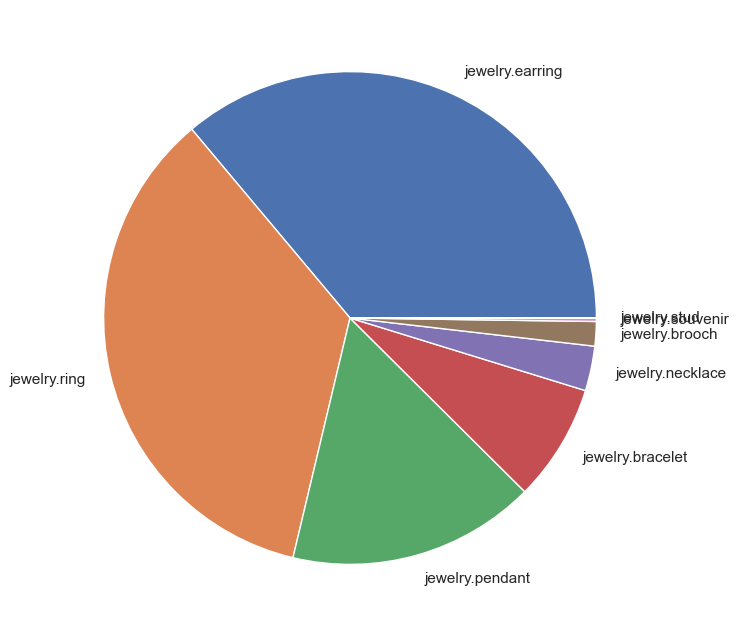

In [24]:
# Visualize jewelry categories
subdata = real_categories["Category"].value_counts()

jewelry_categories, counts = subdata.index.tolist(), subdata.values.tolist()

plt.figure(figsize =(10,8))

plt.pie(x = counts, labels =jewelry_categories)

plt.show();


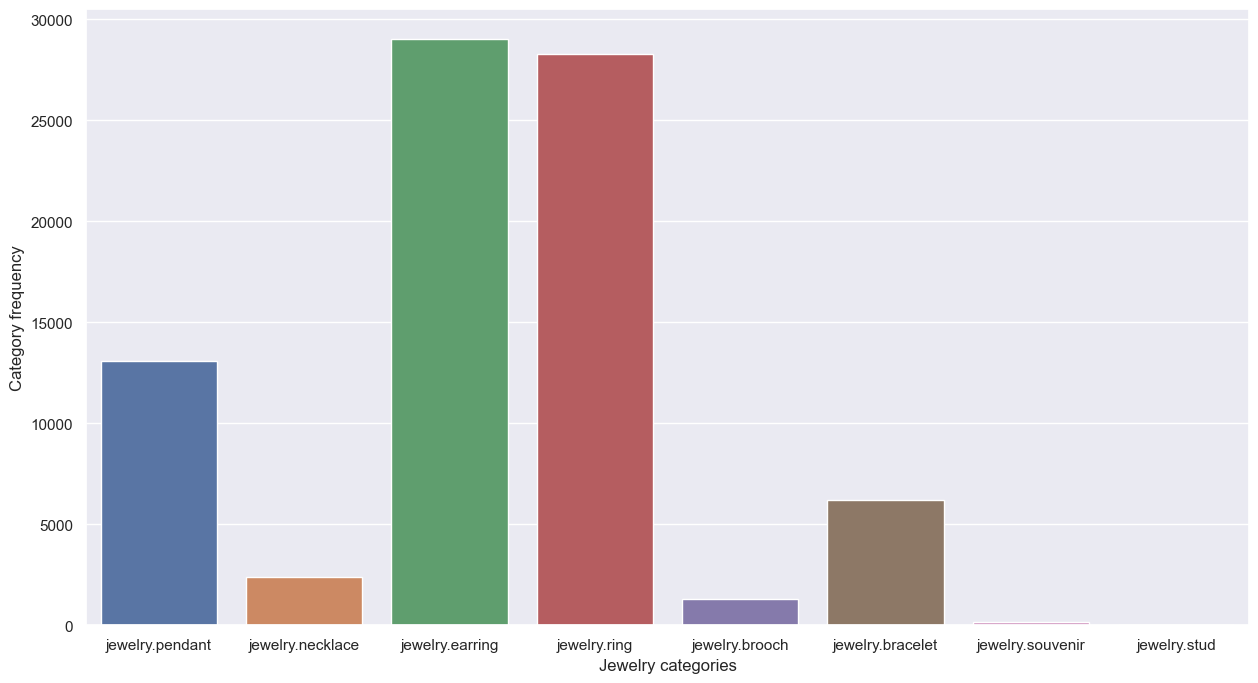

In [25]:
# Category countplot

plt.figure(figsize =(15,8))

sns.countplot(data = real_categories, x = 'Category')

plt.xlabel("Jewelry categories")
plt.ylabel('Category frequency')

plt.show()

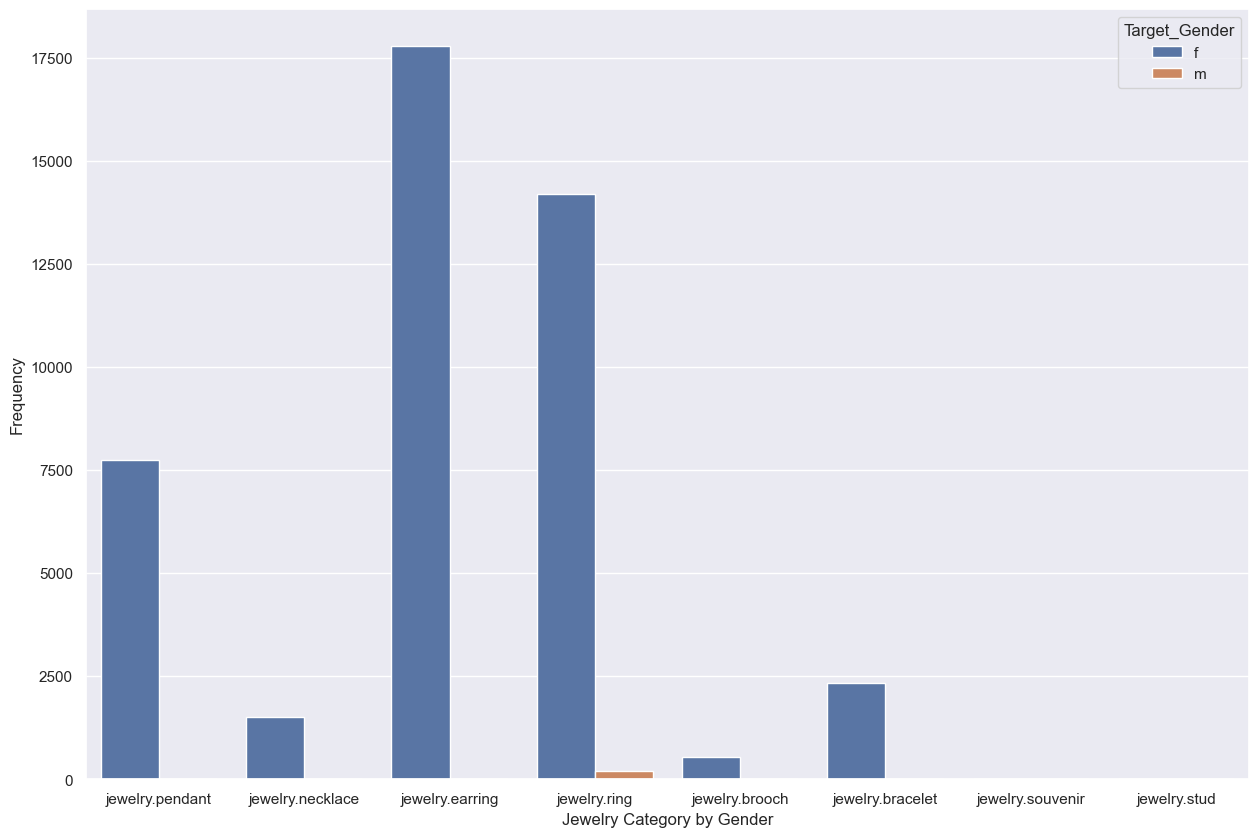

In [26]:
# Jewelry category by gender
plt.figure(figsize=(15,10))

sns.countplot(data = real_categories, x = 'Category', hue = 'Target_Gender')

plt.xlabel("Jewelry Category by Gender")
plt.ylabel("Frequency")
plt.show()

In [27]:
# Gender skew in original data
data['Target_Gender'].value_counts(normalize=True)

f    0.992376
m    0.007624
Name: Target_Gender, dtype: float64

In [28]:
# Gender skew in new data
real_categories['Target_Gender'].value_counts(normalize=True)

f    0.994434
m    0.005566
Name: Target_Gender, dtype: float64

In [29]:
encoded, category_code = pd.factorize(real_categories['Category'])
real_categories.loc[:, "Category"] = encoded

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2788\1110490584.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_categories.loc[:, "Category"] = encoded
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2788\1110490584.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  real_categories.loc[:, "Category"] = encoded


In [30]:
encoded, category_code = pd.factorize(real_categories['Target_Gender'])
real_categories.loc[:, "Target_Gender"] = encoded

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2788\1781748120.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_categories.loc[:, "Target_Gender"] = encoded
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2788\1781748120.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  real_categories.loc[:, "Target_Gender"] = encoded


In [31]:
encoded, category_code = pd.factorize(real_categories['Main_Gem'])
real_categories.loc[:, "Main_Gem"] = encoded

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2788\3528211701.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_categories.loc[:, "Main_Gem"] = encoded
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2788\3528211701.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  real_categories.loc[:, "Main_Gem"] = encoded


In [32]:
encoded, category_code = pd.factorize(real_categories['Main_Color'])
real_categories.loc[:, "Main_Color"] = encoded

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2788\2277587521.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_categories.loc[:, "Main_Color"] = encoded
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2788\2277587521.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  real_categories.loc[:, "Main_Color"] = encoded


In [33]:
encoded, category_code = pd.factorize(real_categories['Main_Metal'])
real_categories.loc[:, "Main_Metal"] = encoded

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2788\3979828366.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_categories.loc[:, "Main_Metal"] = encoded
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2788\3979828366.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  real_categories.loc[:, "Main_Metal"] = encoded


In [34]:
real_categories.head()

Order_Datetime             Order_ID           Product_ID  \
1  2018-12-02 13:53:42 UTC  1925511016616034733  1842214461889315556   
2  2018-12-02 17:44:02 UTC  1925626951238681511  1835566849434059453   
3  2018-12-02 21:30:19 UTC  1925740842841014667  1873936840742928865   
4  2018-12-02 22:09:34 UTC  1925760595336888995  1835566854827934449   
5  2018-12-02 22:09:34 UTC  1925760595336888995  1600021442638905547   

   SKU_Quantity   Category_ID  Category  Brand_ID  Price_USD       User_ID  \
1             1  1.806829e+18         0       1.0      54.66  1.515916e+18   
2             1  1.806829e+18         0       0.0      88.90  1.515916e+18   
3             1  1.806829e+18         1       0.0     417.67  1.515916e+18   
4             1  1.806829e+18         2       1.0     102.27  1.515916e+18   
5             1  1.806829e+18         2       0.0     150.55  1.515916e+18   

   Target_Gender  Main_Color  Main_Metal  Main_Gem  
1              0           0           0         0  
2              0           1           0         1  
3             -1           1           0         2  
4             -1           1           0        -1  
5             -1           1           0         1

In [35]:
real_categories.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80458 entries, 1 to 95909
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order_Datetime  80458 non-null  object 
 1   Order_ID        80458 non-null  int64  
 2   Product_ID      80458 non-null  int64  
 3   SKU_Quantity    80458 non-null  int64  
 4   Category_ID     80458 non-null  float64
 5   Category        80458 non-null  int64  
 6   Brand_ID        76991 non-null  float64
 7   Price_USD       80458 non-null  float64
 8   User_ID         80458 non-null  float64
 9   Target_Gender   80458 non-null  int64  
 10  Main_Color      80458 non-null  int64  
 11  Main_Metal      80458 non-null  int64  
 12  Main_Gem        80458 non-null  int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 8.6+ MB


In [36]:
correlations = real_categories.drop(labels =["Order_Datetime", "User_ID", "Order_ID", "Product_ID"], axis = 1).corr(method = "spearman")

In [37]:
correlations

SKU_Quantity  Category_ID  Category  Brand_ID  Price_USD  \
SKU_Quantity            NaN          NaN       NaN       NaN        NaN   
Category_ID             NaN     1.000000 -0.886212  0.111328  -0.296495   
Category                NaN    -0.886212  1.000000 -0.111680   0.267257   
Brand_ID                NaN     0.111328 -0.111680  1.000000  -0.018428   
Price_USD               NaN    -0.296495  0.267257 -0.018428   1.000000   
Target_Gender           NaN     0.106286 -0.124101  0.623701   0.049532   
Main_Color              NaN     0.003396 -0.059402  0.100816   0.013177   
Main_Metal              NaN     0.157834  0.105056  0.003835  -0.173050   
Main_Gem                NaN     0.050483 -0.082944  0.076277  -0.006630   

               Target_Gender  Main_Color  Main_Metal  Main_Gem  
SKU_Quantity             NaN         NaN         NaN       NaN  
Category_ID         0.106286    0.003396    0.157834  0.050483  
Category           -0.124101   -0.059402    0.105056 -0.082944  
Brand_ID            0.623701    0.100816    0.003835  0.076277  
Price_USD           0.049532    0.013177   -0.173050 -0.006630  
Target_Gender       1.000000    0.056950   -0.046436  0.166125  
Main_Color          0.056950    1.000000   -0.238080  0.136232  
Main_Metal         -0.046436   -0.238080    1.000000 -0.055603  
Main_Gem            0.166125    0.136232   -0.055603  1.000000

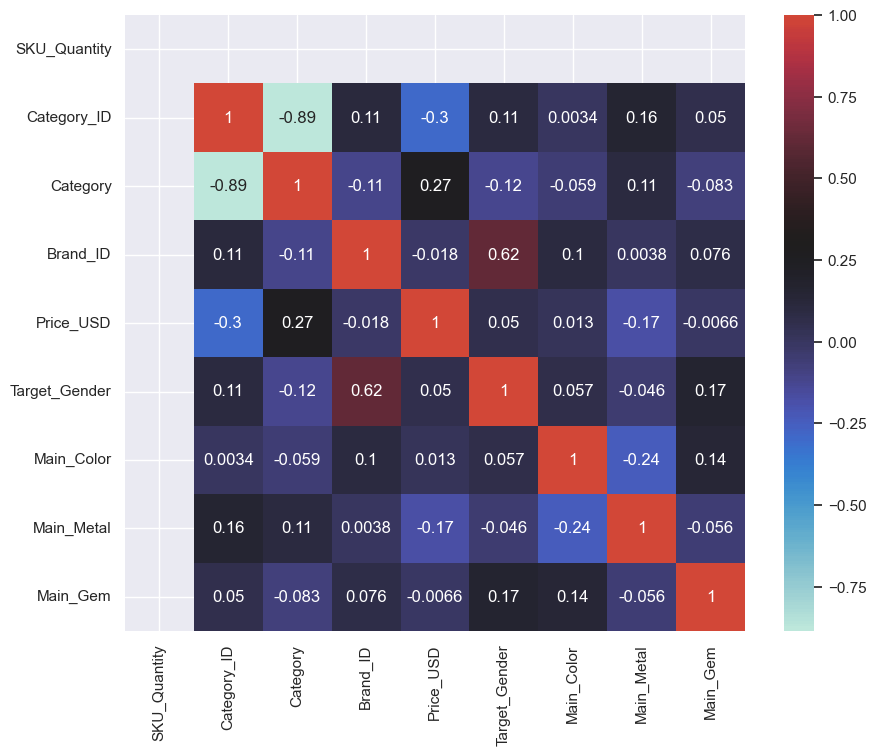

In [38]:
plt.figure(figsize=(10,8))

sns.heatmap(correlations, annot = True, center = .3)
plt.show()

In [39]:
#Set correlation limits
upper = 1
lower = .2

In [40]:
correlated_columns = {
    column: correlations[(correlations[column]> lower) & (upper> correlations[column])].index.tolist()
    for column in correlations.columns
}

In [41]:
correlated_columns

{'SKU_Quantity': [],
 'Category_ID': [],
 'Category': ['Price_USD'],
 'Brand_ID': ['Target_Gender'],
 'Price_USD': ['Category'],
 'Target_Gender': ['Brand_ID'],
 'Main_Color': [],
 'Main_Metal': [],
 'Main_Gem': []}

## 2.2 Data Implications

Implied by our findings above, we can say the following:

    1. Missing values: There are a lot of missing values in the dataset. This may be fixed either by value imputations or encoding.
    
    2. Data corruption: Some variables (e.g jewelry category) contain corrupt values.
    
    3. Rare values: some features have some values that occur rarely. A prime instance of this is the Target Gender column, 
        where the male gender is rarely represented. Sometimes, these are data issues. Other times, like in this case can be a true reflection of the distribution from which the data is generated.
    
    4. Low cardinality or feature invariance: The  SKU_Quantity feature only has one unique value(e.g 1). This fearure provides no new information.
    
    5. Target skew: The target variable is highly right-skewed. This can present an issue during training.
    
    6. Correlation: For the most part, the features exhibit low multicollinearity, hence ensuring feature independence.      However, the target variable exhibits a low corelation  with the independent variables.

 ## 03. Data Preparation

Based on the Data Implications discovered prior, the folowing steps will be experimented upon for the data preparation stage.

    1. Missing values: The missing values will be treated via an algorithmic method. SimpleImputer.
     
    2. Feature Encoding: The categorical features will be encoded.
        
    3. Redundant Features: Certain features will be eliminated for a number of reasons. These are:
        
        A. SKU_Quantity: Feature invariance
            
        B. Order_ID: Simple identifier: has no real-world influence on jewelry price.
                
        C. Product_ID:Same with Order_ID.
        
        D. Order_Datetime: Avoid data leakage, would likely not be available in the real-world.
            
    4. Target Skew: The target variable is strongly right-skewed. This can be an issue when learning a mapping from the data space to the label space. This issue will be fixed
        using the TransformedTargetRegressor utility.
        
    NOTE: Most of the data preparation steps will be carried out via the use of pipeline class from Sci-kit learn. 
    The pipeline object allows us to chain transformers and estimators sequentially for use as one composite object.
    
    High level steps:
        
      1. Eliminate less useful features.
      2. Extract records with actual categories.
      3. Encode categorical features(if required)
      4. Account for target skew.
      5. Fix missing values.
    

In [42]:
# Columns to eliminate

columns_to_eliminate = [
    "SKU_Quantity",
    "Order_ID",
    "Order_Datetime",
    "Product_ID",
    "User_ID",
    "Category_ID",
]

In [43]:
#Eliminate unused features
data.drop(labels = columns_to_eliminate, axis = 1, inplace = True)

In [44]:
data.head()

Category  Brand_ID  Price_USD Target_Gender Main_Color Main_Metal  \
0               NaN       NaN     212.14           NaN     yellow       gold   
1   jewelry.pendant       1.0      54.66             f      white       gold   
2   jewelry.pendant       0.0      88.90             f        red       gold   
3  jewelry.necklace       0.0     417.67           NaN        red       gold   
4   jewelry.earring       1.0     102.27           NaN        red       gold   

   Main_Gem  
0       NaN  
1  sapphire  
2   diamond  
3  amethyst  
4       NaN

In [45]:
# Eliminate unrealistic categories
data = data.loc[data["Category"].isin(categories), :]

In [46]:
data.shape

(80458, 7)

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
# separate features from labels
X, y = data.drop(labels = ["Price_USD"], axis = 1), data["Price_USD"]

In [49]:
# Create test and train splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =.2)

## 04. Data Modeling

1. Linear Regression
2. Extremely Random Forest(ExtraTrees)
3. Adaptive Boosting(AdaBoost)
4. Catboost

  1. Encode categorical features(if required)
  2. Account for target skew.
  3. Fix missing values.

In [50]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, OneHotEncoder
from sklearn.compose import TransformedTargetRegressor, ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PowerTransformer

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor, ExtraTreesRegressor
from catboost import CatBoostRegressor

In [51]:
from sklearn.pipeline import Pipeline

In [52]:
def generate_pipeline(model, column_indices, categorical_indices,fill_missing = True, one_hot = True, label_encode = False):
    
    first_transformer = ColumnTransformer(
    transformers =  [
        ("imputer", SimpleImputer(strategy = "most_frequent"), column_indices)
    ],
    remainder = "passthrough",
    sparse_threshold = 0.
    )
    
    second_transformer = ColumnTransformer(
    transformers =  [
        ("one_hot", OneHotEncoder(), categorical_indices)
    ],
    remainder = "passthrough",
    sparse_threshold = 0.
    )
    
    third_transformer = ColumnTransformer(
    transformers =  [
        ("ordinal", OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), categorical_indices)
    ],
    remainder = "passthrough",
    sparse_threshold = 0.
    )
    
    steps = []
    
    if fill_missing:
        steps.append(("first", first_transformer))
        
    if label_encode:
        steps.append(("third", third_transformer))
        
    if one_hot:
        steps.append(("second", second_transformer))
        
    steps.append(("model", model ))
        
    model_pipe = Pipeline(steps = steps)
    
    return model_pipe

In [53]:
X.head()

Category  Brand_ID Target_Gender Main_Color Main_Metal  Main_Gem
1   jewelry.pendant       1.0             f      white       gold  sapphire
2   jewelry.pendant       0.0             f        red       gold   diamond
3  jewelry.necklace       0.0           NaN        red       gold  amethyst
4   jewelry.earring       1.0           NaN        red       gold       NaN
5   jewelry.earring       0.0           NaN        red       gold   diamond

In [54]:
# Generate indices
columns = X.columns.tolist()

column_indices = [columns.index(c) for c in columns]
categorical_features = [c for c in columns if c not in ["Brand_ID"]]
categorical_indices = [columns.index(c) for c in categorical_features]

In [55]:
categorical_indices

[0, 2, 3, 4, 5]

In [56]:
#Catboost pipeline
cat_pipe = generate_pipeline(
    CatBoostRegressor(loss_function = "RMSE", iterations = 10000, learning_rate = 0.1, one_hot_max_size = 2),
    column_indices,
    categorical_indices,
    fill_missing = False, one_hot = False, label_encode = True
)

In [57]:
#Linear Regression pipeline 
lin_pipe = generate_pipeline(
    LinearRegression(),
    column_indices,
    categorical_indices,
    fill_missing = True, one_hot = True, label_encode = False
)

In [58]:
ada_pipe = generate_pipeline(
    AdaBoostRegressor(loss = "exponential", n_estimators = 1000, learning_rate = .01),
    column_indices,
    categorical_indices,
    fill_missing = True, one_hot = True, label_encode = False
)

In [59]:
extra_pipe = generate_pipeline(
    ExtraTreesRegressor(criterion = "friedman_mse", n_estimators = 1000, bootstrap = True),
    column_indices,
    categorical_indices,
    fill_missing = True, one_hot = True, label_encode = False
)

In [60]:
 #Transform targets

cat_pipe = TransformedTargetRegressor(regressor = cat_pipe, transformer = PowerTransformer(method = "box-cox"))
lin_pipe = TransformedTargetRegressor(regressor = lin_pipe, transformer = PowerTransformer(method = "box-cox"))
ada_pipe = TransformedTargetRegressor(regressor = ada_pipe, transformer = PowerTransformer(method = "box-cox"))
extra_pipe = TransformedTargetRegressor(regressor = extra_pipe, transformer = PowerTransformer(method = "box-cox"))

In [61]:
y_train.head()

78081     684.79
80579     766.99
37449     417.67
11039     205.34
8049     1027.26
Name: Price_USD, dtype: float64

In [62]:
# Fit CatBoost
cat_pipe.fit(X_train, y_train).head()

0:	learn: 0.9565669	total: 204ms	remaining: 33m 58s
1:	learn: 0.9199019	total: 235ms	remaining: 19m 32s
2:	learn: 0.8923350	total: 255ms	remaining: 14m 8s
3:	learn: 0.8661474	total: 270ms	remaining: 11m 14s
4:	learn: 0.8461764	total: 281ms	remaining: 9m 22s
5:	learn: 0.8292252	total: 293ms	remaining: 8m 7s
6:	learn: 0.8117995	total: 304ms	remaining: 7m 13s
7:	learn: 0.7996309	total: 314ms	remaining: 6m 32s
8:	learn: 0.7893651	total: 325ms	remaining: 6m
9:	learn: 0.7798827	total: 335ms	remaining: 5m 35s
10:	learn: 0.7709182	total: 347ms	remaining: 5m 14s
11:	learn: 0.7635299	total: 363ms	remaining: 5m 1s
12:	learn: 0.7546181	total: 376ms	remaining: 4m 49s
13:	learn: 0.7490487	total: 388ms	remaining: 4m 36s
14:	learn: 0.7444154	total: 399ms	remaining: 4m 25s
15:	learn: 0.7366858	total: 412ms	remaining: 4m 17s
16:	learn: 0.7302932	total: 427ms	remaining: 4m 10s
17:	learn: 0.7258072	total: 442ms	remaining: 4m 5s
18:	learn: 0.7218692	total: 453ms	remaining: 3m 57s
19:	learn: 0.7175354	total

161:	learn: 0.6435826	total: 2.06s	remaining: 2m 5s
162:	learn: 0.6434310	total: 2.08s	remaining: 2m 5s
163:	learn: 0.6433837	total: 2.09s	remaining: 2m 5s
164:	learn: 0.6432964	total: 2.1s	remaining: 2m 5s
165:	learn: 0.6431543	total: 2.11s	remaining: 2m 4s
166:	learn: 0.6430168	total: 2.12s	remaining: 2m 4s
167:	learn: 0.6429881	total: 2.13s	remaining: 2m 4s
168:	learn: 0.6429082	total: 2.14s	remaining: 2m 4s
169:	learn: 0.6428192	total: 2.15s	remaining: 2m 4s
170:	learn: 0.6427651	total: 2.16s	remaining: 2m 4s
171:	learn: 0.6426926	total: 2.17s	remaining: 2m 4s
172:	learn: 0.6425043	total: 2.18s	remaining: 2m 3s
173:	learn: 0.6423667	total: 2.19s	remaining: 2m 3s
174:	learn: 0.6422810	total: 2.2s	remaining: 2m 3s
175:	learn: 0.6421199	total: 2.21s	remaining: 2m 3s
176:	learn: 0.6420364	total: 2.22s	remaining: 2m 3s
177:	learn: 0.6419412	total: 2.23s	remaining: 2m 3s
178:	learn: 0.6418723	total: 2.24s	remaining: 2m 3s
179:	learn: 0.6418097	total: 2.25s	remaining: 2m 2s
180:	learn: 0.

333:	learn: 0.6306681	total: 4.19s	remaining: 2m 1s
334:	learn: 0.6306554	total: 4.2s	remaining: 2m 1s
335:	learn: 0.6306457	total: 4.21s	remaining: 2m 1s
336:	learn: 0.6306143	total: 4.23s	remaining: 2m 1s
337:	learn: 0.6306007	total: 4.24s	remaining: 2m 1s
338:	learn: 0.6305683	total: 4.26s	remaining: 2m 1s
339:	learn: 0.6305174	total: 4.28s	remaining: 2m 1s
340:	learn: 0.6304611	total: 4.29s	remaining: 2m 1s
341:	learn: 0.6303918	total: 4.31s	remaining: 2m 1s
342:	learn: 0.6303150	total: 4.32s	remaining: 2m 1s
343:	learn: 0.6302947	total: 4.34s	remaining: 2m 1s
344:	learn: 0.6302622	total: 4.35s	remaining: 2m 1s
345:	learn: 0.6302515	total: 4.37s	remaining: 2m 1s
346:	learn: 0.6301939	total: 4.38s	remaining: 2m 1s
347:	learn: 0.6301504	total: 4.4s	remaining: 2m 2s
348:	learn: 0.6301268	total: 4.42s	remaining: 2m 2s
349:	learn: 0.6300990	total: 4.44s	remaining: 2m 2s
350:	learn: 0.6300823	total: 4.45s	remaining: 2m 2s
351:	learn: 0.6299952	total: 4.47s	remaining: 2m 2s
352:	learn: 0.

505:	learn: 0.6241784	total: 6.47s	remaining: 2m 1s
506:	learn: 0.6241684	total: 6.48s	remaining: 2m 1s
507:	learn: 0.6241071	total: 6.5s	remaining: 2m 1s
508:	learn: 0.6240896	total: 6.51s	remaining: 2m 1s
509:	learn: 0.6240732	total: 6.52s	remaining: 2m 1s
510:	learn: 0.6240411	total: 6.53s	remaining: 2m 1s
511:	learn: 0.6240320	total: 6.54s	remaining: 2m 1s
512:	learn: 0.6239907	total: 6.55s	remaining: 2m 1s
513:	learn: 0.6239768	total: 6.56s	remaining: 2m 1s
514:	learn: 0.6239572	total: 6.57s	remaining: 2m 1s
515:	learn: 0.6239466	total: 6.59s	remaining: 2m 1s
516:	learn: 0.6239331	total: 6.6s	remaining: 2m 1s
517:	learn: 0.6238844	total: 6.61s	remaining: 2m 1s
518:	learn: 0.6238712	total: 6.62s	remaining: 2m 1s
519:	learn: 0.6238559	total: 6.63s	remaining: 2m
520:	learn: 0.6238427	total: 6.65s	remaining: 2m
521:	learn: 0.6238364	total: 6.66s	remaining: 2m
522:	learn: 0.6238126	total: 6.67s	remaining: 2m
523:	learn: 0.6237890	total: 6.69s	remaining: 2m
524:	learn: 0.6237745	total: 

672:	learn: 0.6213084	total: 8.35s	remaining: 1m 55s
673:	learn: 0.6212761	total: 8.36s	remaining: 1m 55s
674:	learn: 0.6212671	total: 8.38s	remaining: 1m 55s
675:	learn: 0.6212562	total: 8.39s	remaining: 1m 55s
676:	learn: 0.6212502	total: 8.4s	remaining: 1m 55s
677:	learn: 0.6212481	total: 8.41s	remaining: 1m 55s
678:	learn: 0.6212420	total: 8.42s	remaining: 1m 55s
679:	learn: 0.6212164	total: 8.44s	remaining: 1m 55s
680:	learn: 0.6212033	total: 8.45s	remaining: 1m 55s
681:	learn: 0.6211966	total: 8.46s	remaining: 1m 55s
682:	learn: 0.6211846	total: 8.47s	remaining: 1m 55s
683:	learn: 0.6211744	total: 8.48s	remaining: 1m 55s
684:	learn: 0.6211554	total: 8.5s	remaining: 1m 55s
685:	learn: 0.6211524	total: 8.51s	remaining: 1m 55s
686:	learn: 0.6211422	total: 8.52s	remaining: 1m 55s
687:	learn: 0.6211104	total: 8.54s	remaining: 1m 55s
688:	learn: 0.6211067	total: 8.55s	remaining: 1m 55s
689:	learn: 0.6210904	total: 8.56s	remaining: 1m 55s
690:	learn: 0.6210850	total: 8.58s	remaining: 1m

827:	learn: 0.6196618	total: 10.2s	remaining: 1m 53s
828:	learn: 0.6196534	total: 10.2s	remaining: 1m 53s
829:	learn: 0.6196518	total: 10.2s	remaining: 1m 53s
830:	learn: 0.6196472	total: 10.3s	remaining: 1m 53s
831:	learn: 0.6196392	total: 10.3s	remaining: 1m 53s
832:	learn: 0.6196308	total: 10.3s	remaining: 1m 53s
833:	learn: 0.6196259	total: 10.3s	remaining: 1m 53s
834:	learn: 0.6196142	total: 10.3s	remaining: 1m 53s
835:	learn: 0.6195982	total: 10.3s	remaining: 1m 53s
836:	learn: 0.6195910	total: 10.3s	remaining: 1m 53s
837:	learn: 0.6195859	total: 10.3s	remaining: 1m 52s
838:	learn: 0.6195819	total: 10.3s	remaining: 1m 52s
839:	learn: 0.6195699	total: 10.4s	remaining: 1m 52s
840:	learn: 0.6195636	total: 10.4s	remaining: 1m 52s
841:	learn: 0.6195589	total: 10.4s	remaining: 1m 52s
842:	learn: 0.6195534	total: 10.4s	remaining: 1m 52s
843:	learn: 0.6195510	total: 10.4s	remaining: 1m 52s
844:	learn: 0.6195295	total: 10.4s	remaining: 1m 52s
845:	learn: 0.6195195	total: 10.4s	remaining: 

1000:	learn: 0.6185307	total: 12.1s	remaining: 1m 49s
1001:	learn: 0.6185272	total: 12.1s	remaining: 1m 49s
1002:	learn: 0.6185248	total: 12.2s	remaining: 1m 49s
1003:	learn: 0.6185196	total: 12.2s	remaining: 1m 49s
1004:	learn: 0.6185141	total: 12.2s	remaining: 1m 49s
1005:	learn: 0.6185114	total: 12.2s	remaining: 1m 49s
1006:	learn: 0.6185100	total: 12.2s	remaining: 1m 48s
1007:	learn: 0.6185100	total: 12.2s	remaining: 1m 48s
1008:	learn: 0.6185058	total: 12.2s	remaining: 1m 48s
1009:	learn: 0.6184945	total: 12.2s	remaining: 1m 48s
1010:	learn: 0.6184861	total: 12.2s	remaining: 1m 48s
1011:	learn: 0.6184841	total: 12.3s	remaining: 1m 48s
1012:	learn: 0.6184776	total: 12.3s	remaining: 1m 48s
1013:	learn: 0.6184636	total: 12.3s	remaining: 1m 48s
1014:	learn: 0.6184566	total: 12.3s	remaining: 1m 48s
1015:	learn: 0.6184483	total: 12.3s	remaining: 1m 48s
1016:	learn: 0.6184444	total: 12.3s	remaining: 1m 48s
1017:	learn: 0.6184424	total: 12.3s	remaining: 1m 48s
1018:	learn: 0.6184406	total

1156:	learn: 0.6178497	total: 13.8s	remaining: 1m 45s
1157:	learn: 0.6178440	total: 13.8s	remaining: 1m 45s
1158:	learn: 0.6178410	total: 13.8s	remaining: 1m 45s
1159:	learn: 0.6178378	total: 13.8s	remaining: 1m 45s
1160:	learn: 0.6178320	total: 13.8s	remaining: 1m 45s
1161:	learn: 0.6178258	total: 13.8s	remaining: 1m 45s
1162:	learn: 0.6178249	total: 13.9s	remaining: 1m 45s
1163:	learn: 0.6178237	total: 13.9s	remaining: 1m 45s
1164:	learn: 0.6178181	total: 13.9s	remaining: 1m 45s
1165:	learn: 0.6178150	total: 13.9s	remaining: 1m 45s
1166:	learn: 0.6178112	total: 13.9s	remaining: 1m 45s
1167:	learn: 0.6177959	total: 13.9s	remaining: 1m 45s
1168:	learn: 0.6177940	total: 13.9s	remaining: 1m 45s
1169:	learn: 0.6177927	total: 13.9s	remaining: 1m 45s
1170:	learn: 0.6177908	total: 13.9s	remaining: 1m 45s
1171:	learn: 0.6177908	total: 13.9s	remaining: 1m 45s
1172:	learn: 0.6177889	total: 14s	remaining: 1m 45s
1173:	learn: 0.6177790	total: 14s	remaining: 1m 45s
1174:	learn: 0.6177777	total: 14

1318:	learn: 0.6172938	total: 15.6s	remaining: 1m 42s
1319:	learn: 0.6172910	total: 15.6s	remaining: 1m 42s
1320:	learn: 0.6172910	total: 15.7s	remaining: 1m 42s
1321:	learn: 0.6172909	total: 15.7s	remaining: 1m 42s
1322:	learn: 0.6172885	total: 15.7s	remaining: 1m 42s
1323:	learn: 0.6172853	total: 15.7s	remaining: 1m 42s
1324:	learn: 0.6172828	total: 15.7s	remaining: 1m 42s
1325:	learn: 0.6172820	total: 15.7s	remaining: 1m 42s
1326:	learn: 0.6172786	total: 15.7s	remaining: 1m 42s
1327:	learn: 0.6172727	total: 15.7s	remaining: 1m 42s
1328:	learn: 0.6172713	total: 15.8s	remaining: 1m 42s
1329:	learn: 0.6172633	total: 15.8s	remaining: 1m 42s
1330:	learn: 0.6172621	total: 15.8s	remaining: 1m 42s
1331:	learn: 0.6172600	total: 15.8s	remaining: 1m 42s
1332:	learn: 0.6172575	total: 15.8s	remaining: 1m 42s
1333:	learn: 0.6172563	total: 15.8s	remaining: 1m 42s
1334:	learn: 0.6172494	total: 15.8s	remaining: 1m 42s
1335:	learn: 0.6172494	total: 15.8s	remaining: 1m 42s
1336:	learn: 0.6172479	total

1478:	learn: 0.6168707	total: 17.3s	remaining: 1m 39s
1479:	learn: 0.6168706	total: 17.3s	remaining: 1m 39s
1480:	learn: 0.6168685	total: 17.3s	remaining: 1m 39s
1481:	learn: 0.6168658	total: 17.3s	remaining: 1m 39s
1482:	learn: 0.6168648	total: 17.3s	remaining: 1m 39s
1483:	learn: 0.6168641	total: 17.4s	remaining: 1m 39s
1484:	learn: 0.6168636	total: 17.4s	remaining: 1m 39s
1485:	learn: 0.6168484	total: 17.4s	remaining: 1m 39s
1486:	learn: 0.6168456	total: 17.4s	remaining: 1m 39s
1487:	learn: 0.6168451	total: 17.4s	remaining: 1m 39s
1488:	learn: 0.6168451	total: 17.4s	remaining: 1m 39s
1489:	learn: 0.6168426	total: 17.4s	remaining: 1m 39s
1490:	learn: 0.6168400	total: 17.4s	remaining: 1m 39s
1491:	learn: 0.6168396	total: 17.4s	remaining: 1m 39s
1492:	learn: 0.6168354	total: 17.4s	remaining: 1m 39s
1493:	learn: 0.6168324	total: 17.5s	remaining: 1m 39s
1494:	learn: 0.6168307	total: 17.5s	remaining: 1m 39s
1495:	learn: 0.6168267	total: 17.5s	remaining: 1m 39s
1496:	learn: 0.6168267	total

1641:	learn: 0.6164903	total: 19s	remaining: 1m 36s
1642:	learn: 0.6164896	total: 19s	remaining: 1m 36s
1643:	learn: 0.6164797	total: 19s	remaining: 1m 36s
1644:	learn: 0.6164741	total: 19s	remaining: 1m 36s
1645:	learn: 0.6164716	total: 19s	remaining: 1m 36s
1646:	learn: 0.6164713	total: 19s	remaining: 1m 36s
1647:	learn: 0.6164704	total: 19.1s	remaining: 1m 36s
1648:	learn: 0.6164680	total: 19.1s	remaining: 1m 36s
1649:	learn: 0.6164665	total: 19.1s	remaining: 1m 36s
1650:	learn: 0.6164641	total: 19.1s	remaining: 1m 36s
1651:	learn: 0.6164625	total: 19.1s	remaining: 1m 36s
1652:	learn: 0.6164617	total: 19.1s	remaining: 1m 36s
1653:	learn: 0.6164609	total: 19.1s	remaining: 1m 36s
1654:	learn: 0.6164607	total: 19.1s	remaining: 1m 36s
1655:	learn: 0.6164577	total: 19.1s	remaining: 1m 36s
1656:	learn: 0.6164560	total: 19.1s	remaining: 1m 36s
1657:	learn: 0.6164526	total: 19.2s	remaining: 1m 36s
1658:	learn: 0.6164438	total: 19.2s	remaining: 1m 36s
1659:	learn: 0.6164434	total: 19.2s	rema

1805:	learn: 0.6162280	total: 20.9s	remaining: 1m 34s
1806:	learn: 0.6162276	total: 20.9s	remaining: 1m 34s
1807:	learn: 0.6162269	total: 20.9s	remaining: 1m 34s
1808:	learn: 0.6162256	total: 20.9s	remaining: 1m 34s
1809:	learn: 0.6162250	total: 20.9s	remaining: 1m 34s
1810:	learn: 0.6162238	total: 20.9s	remaining: 1m 34s
1811:	learn: 0.6162230	total: 20.9s	remaining: 1m 34s
1812:	learn: 0.6162230	total: 21s	remaining: 1m 34s
1813:	learn: 0.6162229	total: 21s	remaining: 1m 34s
1814:	learn: 0.6162220	total: 21s	remaining: 1m 34s
1815:	learn: 0.6162198	total: 21s	remaining: 1m 34s
1816:	learn: 0.6162181	total: 21s	remaining: 1m 34s
1817:	learn: 0.6162176	total: 21s	remaining: 1m 34s
1818:	learn: 0.6162164	total: 21s	remaining: 1m 34s
1819:	learn: 0.6162162	total: 21s	remaining: 1m 34s
1820:	learn: 0.6162162	total: 21s	remaining: 1m 34s
1821:	learn: 0.6162154	total: 21s	remaining: 1m 34s
1822:	learn: 0.6162153	total: 21s	remaining: 1m 34s
1823:	learn: 0.6162124	total: 21.1s	remaining: 1m 

1965:	learn: 0.6159889	total: 22.6s	remaining: 1m 32s
1966:	learn: 0.6159843	total: 22.6s	remaining: 1m 32s
1967:	learn: 0.6159773	total: 22.6s	remaining: 1m 32s
1968:	learn: 0.6159769	total: 22.6s	remaining: 1m 32s
1969:	learn: 0.6159731	total: 22.6s	remaining: 1m 32s
1970:	learn: 0.6159701	total: 22.6s	remaining: 1m 32s
1971:	learn: 0.6159696	total: 22.7s	remaining: 1m 32s
1972:	learn: 0.6159673	total: 22.7s	remaining: 1m 32s
1973:	learn: 0.6159648	total: 22.7s	remaining: 1m 32s
1974:	learn: 0.6159645	total: 22.7s	remaining: 1m 32s
1975:	learn: 0.6159620	total: 22.7s	remaining: 1m 32s
1976:	learn: 0.6159587	total: 22.7s	remaining: 1m 32s
1977:	learn: 0.6159573	total: 22.7s	remaining: 1m 32s
1978:	learn: 0.6159561	total: 22.7s	remaining: 1m 32s
1979:	learn: 0.6159527	total: 22.7s	remaining: 1m 32s
1980:	learn: 0.6159524	total: 22.8s	remaining: 1m 32s
1981:	learn: 0.6159488	total: 22.8s	remaining: 1m 32s
1982:	learn: 0.6159484	total: 22.8s	remaining: 1m 32s
1983:	learn: 0.6159483	total

2134:	learn: 0.6157660	total: 24.4s	remaining: 1m 30s
2135:	learn: 0.6157658	total: 24.5s	remaining: 1m 30s
2136:	learn: 0.6157657	total: 24.5s	remaining: 1m 30s
2137:	learn: 0.6157649	total: 24.5s	remaining: 1m 30s
2138:	learn: 0.6157647	total: 24.5s	remaining: 1m 30s
2139:	learn: 0.6157642	total: 24.5s	remaining: 1m 30s
2140:	learn: 0.6157632	total: 24.5s	remaining: 1m 30s
2141:	learn: 0.6157612	total: 24.5s	remaining: 1m 30s
2142:	learn: 0.6157555	total: 24.6s	remaining: 1m 30s
2143:	learn: 0.6157547	total: 24.6s	remaining: 1m 30s
2144:	learn: 0.6157540	total: 24.6s	remaining: 1m 30s
2145:	learn: 0.6157532	total: 24.6s	remaining: 1m 29s
2146:	learn: 0.6157523	total: 24.6s	remaining: 1m 29s
2147:	learn: 0.6157520	total: 24.6s	remaining: 1m 29s
2148:	learn: 0.6157520	total: 24.6s	remaining: 1m 29s
2149:	learn: 0.6157516	total: 24.6s	remaining: 1m 29s
2150:	learn: 0.6157508	total: 24.6s	remaining: 1m 29s
2151:	learn: 0.6157505	total: 24.8s	remaining: 1m 30s
2152:	learn: 0.6157503	total

2292:	learn: 0.6156122	total: 26.9s	remaining: 1m 30s
2293:	learn: 0.6156120	total: 26.9s	remaining: 1m 30s
2294:	learn: 0.6156120	total: 26.9s	remaining: 1m 30s
2295:	learn: 0.6156115	total: 26.9s	remaining: 1m 30s
2296:	learn: 0.6156055	total: 26.9s	remaining: 1m 30s
2297:	learn: 0.6156048	total: 27s	remaining: 1m 30s
2298:	learn: 0.6156048	total: 27s	remaining: 1m 30s
2299:	learn: 0.6156048	total: 27s	remaining: 1m 30s
2300:	learn: 0.6156008	total: 27s	remaining: 1m 30s
2301:	learn: 0.6155997	total: 27s	remaining: 1m 30s
2302:	learn: 0.6155993	total: 27s	remaining: 1m 30s
2303:	learn: 0.6155967	total: 27s	remaining: 1m 30s
2304:	learn: 0.6155961	total: 27s	remaining: 1m 30s
2305:	learn: 0.6155957	total: 27s	remaining: 1m 30s
2306:	learn: 0.6155957	total: 27s	remaining: 1m 30s
2307:	learn: 0.6155948	total: 27s	remaining: 1m 30s
2308:	learn: 0.6155947	total: 27.1s	remaining: 1m 30s
2309:	learn: 0.6155945	total: 27.1s	remaining: 1m 30s
2310:	learn: 0.6155897	total: 27.1s	remaining: 1m 

2457:	learn: 0.6154910	total: 28.6s	remaining: 1m 27s
2458:	learn: 0.6154904	total: 28.6s	remaining: 1m 27s
2459:	learn: 0.6154902	total: 28.6s	remaining: 1m 27s
2460:	learn: 0.6154901	total: 28.6s	remaining: 1m 27s
2461:	learn: 0.6154887	total: 28.6s	remaining: 1m 27s
2462:	learn: 0.6154886	total: 28.6s	remaining: 1m 27s
2463:	learn: 0.6154880	total: 28.6s	remaining: 1m 27s
2464:	learn: 0.6154875	total: 28.7s	remaining: 1m 27s
2465:	learn: 0.6154872	total: 28.7s	remaining: 1m 27s
2466:	learn: 0.6154868	total: 28.7s	remaining: 1m 27s
2467:	learn: 0.6154863	total: 28.7s	remaining: 1m 27s
2468:	learn: 0.6154856	total: 28.7s	remaining: 1m 27s
2469:	learn: 0.6154855	total: 28.7s	remaining: 1m 27s
2470:	learn: 0.6154852	total: 28.7s	remaining: 1m 27s
2471:	learn: 0.6154843	total: 28.7s	remaining: 1m 27s
2472:	learn: 0.6154840	total: 28.7s	remaining: 1m 27s
2473:	learn: 0.6154780	total: 28.7s	remaining: 1m 27s
2474:	learn: 0.6154779	total: 28.8s	remaining: 1m 27s
2475:	learn: 0.6154776	total

2624:	learn: 0.6153782	total: 30.3s	remaining: 1m 25s
2625:	learn: 0.6153772	total: 30.3s	remaining: 1m 25s
2626:	learn: 0.6153730	total: 30.3s	remaining: 1m 25s
2627:	learn: 0.6153724	total: 30.3s	remaining: 1m 25s
2628:	learn: 0.6153724	total: 30.3s	remaining: 1m 24s
2629:	learn: 0.6153723	total: 30.3s	remaining: 1m 24s
2630:	learn: 0.6153719	total: 30.3s	remaining: 1m 24s
2631:	learn: 0.6153714	total: 30.3s	remaining: 1m 24s
2632:	learn: 0.6153709	total: 30.4s	remaining: 1m 24s
2633:	learn: 0.6153707	total: 30.4s	remaining: 1m 24s
2634:	learn: 0.6153705	total: 30.4s	remaining: 1m 24s
2635:	learn: 0.6153700	total: 30.4s	remaining: 1m 24s
2636:	learn: 0.6153695	total: 30.4s	remaining: 1m 24s
2637:	learn: 0.6153687	total: 30.4s	remaining: 1m 24s
2638:	learn: 0.6153685	total: 30.4s	remaining: 1m 24s
2639:	learn: 0.6153683	total: 30.4s	remaining: 1m 24s
2640:	learn: 0.6153678	total: 30.4s	remaining: 1m 24s
2641:	learn: 0.6153676	total: 30.4s	remaining: 1m 24s
2642:	learn: 0.6153674	total

2787:	learn: 0.6152826	total: 31.9s	remaining: 1m 22s
2788:	learn: 0.6152794	total: 31.9s	remaining: 1m 22s
2789:	learn: 0.6152782	total: 32s	remaining: 1m 22s
2790:	learn: 0.6152781	total: 32s	remaining: 1m 22s
2791:	learn: 0.6152781	total: 32s	remaining: 1m 22s
2792:	learn: 0.6152777	total: 32s	remaining: 1m 22s
2793:	learn: 0.6152773	total: 32s	remaining: 1m 22s
2794:	learn: 0.6152769	total: 32s	remaining: 1m 22s
2795:	learn: 0.6152766	total: 32s	remaining: 1m 22s
2796:	learn: 0.6152762	total: 32s	remaining: 1m 22s
2797:	learn: 0.6152757	total: 32s	remaining: 1m 22s
2798:	learn: 0.6152755	total: 32s	remaining: 1m 22s
2799:	learn: 0.6152755	total: 32.1s	remaining: 1m 22s
2800:	learn: 0.6152746	total: 32.1s	remaining: 1m 22s
2801:	learn: 0.6152744	total: 32.1s	remaining: 1m 22s
2802:	learn: 0.6152743	total: 32.1s	remaining: 1m 22s
2803:	learn: 0.6152731	total: 32.1s	remaining: 1m 22s
2804:	learn: 0.6152713	total: 32.1s	remaining: 1m 22s
2805:	learn: 0.6152707	total: 32.1s	remaining: 1

2952:	learn: 0.6151893	total: 33.6s	remaining: 1m 20s
2953:	learn: 0.6151866	total: 33.6s	remaining: 1m 20s
2954:	learn: 0.6151864	total: 33.6s	remaining: 1m 20s
2955:	learn: 0.6151863	total: 33.7s	remaining: 1m 20s
2956:	learn: 0.6151863	total: 33.7s	remaining: 1m 20s
2957:	learn: 0.6151862	total: 33.7s	remaining: 1m 20s
2958:	learn: 0.6151861	total: 33.7s	remaining: 1m 20s
2959:	learn: 0.6151857	total: 33.7s	remaining: 1m 20s
2960:	learn: 0.6151851	total: 33.7s	remaining: 1m 20s
2961:	learn: 0.6151847	total: 33.7s	remaining: 1m 20s
2962:	learn: 0.6151843	total: 33.7s	remaining: 1m 20s
2963:	learn: 0.6151830	total: 33.7s	remaining: 1m 20s
2964:	learn: 0.6151825	total: 33.8s	remaining: 1m 20s
2965:	learn: 0.6151818	total: 33.8s	remaining: 1m 20s
2966:	learn: 0.6151817	total: 33.8s	remaining: 1m 20s
2967:	learn: 0.6151796	total: 33.8s	remaining: 1m 20s
2968:	learn: 0.6151785	total: 33.8s	remaining: 1m 20s
2969:	learn: 0.6151782	total: 33.8s	remaining: 1m 20s
2970:	learn: 0.6151759	total

3111:	learn: 0.6151175	total: 35.3s	remaining: 1m 18s
3112:	learn: 0.6151170	total: 35.3s	remaining: 1m 18s
3113:	learn: 0.6151169	total: 35.3s	remaining: 1m 18s
3114:	learn: 0.6151169	total: 35.3s	remaining: 1m 18s
3115:	learn: 0.6151167	total: 35.3s	remaining: 1m 18s
3116:	learn: 0.6151158	total: 35.3s	remaining: 1m 17s
3117:	learn: 0.6151145	total: 35.3s	remaining: 1m 17s
3118:	learn: 0.6151145	total: 35.3s	remaining: 1m 17s
3119:	learn: 0.6151145	total: 35.3s	remaining: 1m 17s
3120:	learn: 0.6151137	total: 35.4s	remaining: 1m 17s
3121:	learn: 0.6151136	total: 35.4s	remaining: 1m 17s
3122:	learn: 0.6151134	total: 35.4s	remaining: 1m 17s
3123:	learn: 0.6151130	total: 35.4s	remaining: 1m 17s
3124:	learn: 0.6151129	total: 35.4s	remaining: 1m 17s
3125:	learn: 0.6151123	total: 35.4s	remaining: 1m 17s
3126:	learn: 0.6151110	total: 35.4s	remaining: 1m 17s
3127:	learn: 0.6151087	total: 35.4s	remaining: 1m 17s
3128:	learn: 0.6151086	total: 35.4s	remaining: 1m 17s
3129:	learn: 0.6151086	total

3267:	learn: 0.6150462	total: 36.9s	remaining: 1m 16s
3268:	learn: 0.6150462	total: 36.9s	remaining: 1m 16s
3269:	learn: 0.6150452	total: 36.9s	remaining: 1m 15s
3270:	learn: 0.6150452	total: 36.9s	remaining: 1m 15s
3271:	learn: 0.6150448	total: 36.9s	remaining: 1m 15s
3272:	learn: 0.6150446	total: 36.9s	remaining: 1m 15s
3273:	learn: 0.6150445	total: 37s	remaining: 1m 15s
3274:	learn: 0.6150426	total: 37s	remaining: 1m 15s
3275:	learn: 0.6150426	total: 37s	remaining: 1m 15s
3276:	learn: 0.6150422	total: 37s	remaining: 1m 15s
3277:	learn: 0.6150421	total: 37s	remaining: 1m 15s
3278:	learn: 0.6150415	total: 37s	remaining: 1m 15s
3279:	learn: 0.6150414	total: 37s	remaining: 1m 15s
3280:	learn: 0.6150414	total: 37s	remaining: 1m 15s
3281:	learn: 0.6150407	total: 37s	remaining: 1m 15s
3282:	learn: 0.6150401	total: 37s	remaining: 1m 15s
3283:	learn: 0.6150401	total: 37.1s	remaining: 1m 15s
3284:	learn: 0.6150401	total: 37.1s	remaining: 1m 15s
3285:	learn: 0.6150395	total: 37.1s	remaining: 1

3430:	learn: 0.6149849	total: 38.5s	remaining: 1m 13s
3431:	learn: 0.6149848	total: 38.6s	remaining: 1m 13s
3432:	learn: 0.6149835	total: 38.6s	remaining: 1m 13s
3433:	learn: 0.6149834	total: 38.6s	remaining: 1m 13s
3434:	learn: 0.6149834	total: 38.6s	remaining: 1m 13s
3435:	learn: 0.6149830	total: 38.6s	remaining: 1m 13s
3436:	learn: 0.6149830	total: 38.6s	remaining: 1m 13s
3437:	learn: 0.6149830	total: 38.6s	remaining: 1m 13s
3438:	learn: 0.6149819	total: 38.6s	remaining: 1m 13s
3439:	learn: 0.6149818	total: 38.6s	remaining: 1m 13s
3440:	learn: 0.6149816	total: 38.6s	remaining: 1m 13s
3441:	learn: 0.6149816	total: 38.7s	remaining: 1m 13s
3442:	learn: 0.6149808	total: 38.7s	remaining: 1m 13s
3443:	learn: 0.6149806	total: 38.7s	remaining: 1m 13s
3444:	learn: 0.6149806	total: 38.7s	remaining: 1m 13s
3445:	learn: 0.6149804	total: 38.7s	remaining: 1m 13s
3446:	learn: 0.6149797	total: 38.7s	remaining: 1m 13s
3447:	learn: 0.6149793	total: 38.7s	remaining: 1m 13s
3448:	learn: 0.6149790	total

3593:	learn: 0.6149325	total: 40.2s	remaining: 1m 11s
3594:	learn: 0.6149309	total: 40.2s	remaining: 1m 11s
3595:	learn: 0.6149301	total: 40.2s	remaining: 1m 11s
3596:	learn: 0.6149301	total: 40.2s	remaining: 1m 11s
3597:	learn: 0.6149294	total: 40.2s	remaining: 1m 11s
3598:	learn: 0.6149290	total: 40.3s	remaining: 1m 11s
3599:	learn: 0.6149290	total: 40.3s	remaining: 1m 11s
3600:	learn: 0.6149286	total: 40.3s	remaining: 1m 11s
3601:	learn: 0.6149286	total: 40.3s	remaining: 1m 11s
3602:	learn: 0.6149285	total: 40.3s	remaining: 1m 11s
3603:	learn: 0.6149284	total: 40.3s	remaining: 1m 11s
3604:	learn: 0.6149283	total: 40.3s	remaining: 1m 11s
3605:	learn: 0.6149277	total: 40.3s	remaining: 1m 11s
3606:	learn: 0.6149275	total: 40.3s	remaining: 1m 11s
3607:	learn: 0.6149274	total: 40.3s	remaining: 1m 11s
3608:	learn: 0.6149274	total: 40.3s	remaining: 1m 11s
3609:	learn: 0.6149272	total: 40.4s	remaining: 1m 11s
3610:	learn: 0.6149262	total: 40.4s	remaining: 1m 11s
3611:	learn: 0.6149262	total

3753:	learn: 0.6148678	total: 41.9s	remaining: 1m 9s
3754:	learn: 0.6148678	total: 41.9s	remaining: 1m 9s
3755:	learn: 0.6148677	total: 41.9s	remaining: 1m 9s
3756:	learn: 0.6148676	total: 41.9s	remaining: 1m 9s
3757:	learn: 0.6148675	total: 41.9s	remaining: 1m 9s
3758:	learn: 0.6148674	total: 41.9s	remaining: 1m 9s
3759:	learn: 0.6148674	total: 41.9s	remaining: 1m 9s
3760:	learn: 0.6148674	total: 41.9s	remaining: 1m 9s
3761:	learn: 0.6148669	total: 42s	remaining: 1m 9s
3762:	learn: 0.6148668	total: 42s	remaining: 1m 9s
3763:	learn: 0.6148661	total: 42s	remaining: 1m 9s
3764:	learn: 0.6148661	total: 42s	remaining: 1m 9s
3765:	learn: 0.6148657	total: 42s	remaining: 1m 9s
3766:	learn: 0.6148656	total: 42s	remaining: 1m 9s
3767:	learn: 0.6148656	total: 42s	remaining: 1m 9s
3768:	learn: 0.6148655	total: 42s	remaining: 1m 9s
3769:	learn: 0.6148652	total: 42s	remaining: 1m 9s
3770:	learn: 0.6148650	total: 42s	remaining: 1m 9s
3771:	learn: 0.6148650	total: 42.1s	remaining: 1m 9s
3772:	learn: 

3910:	learn: 0.6148340	total: 43.5s	remaining: 1m 7s
3911:	learn: 0.6148339	total: 43.5s	remaining: 1m 7s
3912:	learn: 0.6148338	total: 43.5s	remaining: 1m 7s
3913:	learn: 0.6148337	total: 43.6s	remaining: 1m 7s
3914:	learn: 0.6148336	total: 43.6s	remaining: 1m 7s
3915:	learn: 0.6148334	total: 43.6s	remaining: 1m 7s
3916:	learn: 0.6148324	total: 43.6s	remaining: 1m 7s
3917:	learn: 0.6148324	total: 43.6s	remaining: 1m 7s
3918:	learn: 0.6148320	total: 43.6s	remaining: 1m 7s
3919:	learn: 0.6148320	total: 43.6s	remaining: 1m 7s
3920:	learn: 0.6148314	total: 43.6s	remaining: 1m 7s
3921:	learn: 0.6148310	total: 43.6s	remaining: 1m 7s
3922:	learn: 0.6148301	total: 43.6s	remaining: 1m 7s
3923:	learn: 0.6148300	total: 43.7s	remaining: 1m 7s
3924:	learn: 0.6148299	total: 43.7s	remaining: 1m 7s
3925:	learn: 0.6148296	total: 43.7s	remaining: 1m 7s
3926:	learn: 0.6148296	total: 43.7s	remaining: 1m 7s
3927:	learn: 0.6148296	total: 43.7s	remaining: 1m 7s
3928:	learn: 0.6148295	total: 43.7s	remaining:

4070:	learn: 0.6147913	total: 45.2s	remaining: 1m 5s
4071:	learn: 0.6147913	total: 45.2s	remaining: 1m 5s
4072:	learn: 0.6147913	total: 45.2s	remaining: 1m 5s
4073:	learn: 0.6147912	total: 45.2s	remaining: 1m 5s
4074:	learn: 0.6147911	total: 45.2s	remaining: 1m 5s
4075:	learn: 0.6147911	total: 45.2s	remaining: 1m 5s
4076:	learn: 0.6147911	total: 45.2s	remaining: 1m 5s
4077:	learn: 0.6147907	total: 45.3s	remaining: 1m 5s
4078:	learn: 0.6147897	total: 45.3s	remaining: 1m 5s
4079:	learn: 0.6147897	total: 45.3s	remaining: 1m 5s
4080:	learn: 0.6147897	total: 45.3s	remaining: 1m 5s
4081:	learn: 0.6147891	total: 45.3s	remaining: 1m 5s
4082:	learn: 0.6147890	total: 45.3s	remaining: 1m 5s
4083:	learn: 0.6147887	total: 45.3s	remaining: 1m 5s
4084:	learn: 0.6147880	total: 45.3s	remaining: 1m 5s
4085:	learn: 0.6147879	total: 45.3s	remaining: 1m 5s
4086:	learn: 0.6147878	total: 45.3s	remaining: 1m 5s
4087:	learn: 0.6147875	total: 45.4s	remaining: 1m 5s
4088:	learn: 0.6147874	total: 45.4s	remaining:

4230:	learn: 0.6147544	total: 46.8s	remaining: 1m 3s
4231:	learn: 0.6147542	total: 46.9s	remaining: 1m 3s
4232:	learn: 0.6147541	total: 46.9s	remaining: 1m 3s
4233:	learn: 0.6147536	total: 46.9s	remaining: 1m 3s
4234:	learn: 0.6147535	total: 46.9s	remaining: 1m 3s
4235:	learn: 0.6147535	total: 46.9s	remaining: 1m 3s
4236:	learn: 0.6147534	total: 46.9s	remaining: 1m 3s
4237:	learn: 0.6147531	total: 46.9s	remaining: 1m 3s
4238:	learn: 0.6147527	total: 46.9s	remaining: 1m 3s
4239:	learn: 0.6147526	total: 46.9s	remaining: 1m 3s
4240:	learn: 0.6147526	total: 46.9s	remaining: 1m 3s
4241:	learn: 0.6147525	total: 46.9s	remaining: 1m 3s
4242:	learn: 0.6147524	total: 47s	remaining: 1m 3s
4243:	learn: 0.6147524	total: 47s	remaining: 1m 3s
4244:	learn: 0.6147523	total: 47s	remaining: 1m 3s
4245:	learn: 0.6147522	total: 47s	remaining: 1m 3s
4246:	learn: 0.6147520	total: 47s	remaining: 1m 3s
4247:	learn: 0.6147520	total: 47s	remaining: 1m 3s
4248:	learn: 0.6147519	total: 47s	remaining: 1m 3s
4249:	l

4390:	learn: 0.6147280	total: 48.5s	remaining: 1m 1s
4391:	learn: 0.6147280	total: 48.5s	remaining: 1m 1s
4392:	learn: 0.6147278	total: 48.5s	remaining: 1m 1s
4393:	learn: 0.6147277	total: 48.5s	remaining: 1m 1s
4394:	learn: 0.6147277	total: 48.6s	remaining: 1m 1s
4395:	learn: 0.6147276	total: 48.6s	remaining: 1m 1s
4396:	learn: 0.6147271	total: 48.6s	remaining: 1m 1s
4397:	learn: 0.6147268	total: 48.6s	remaining: 1m 1s
4398:	learn: 0.6147266	total: 48.6s	remaining: 1m 1s
4399:	learn: 0.6147261	total: 48.6s	remaining: 1m 1s
4400:	learn: 0.6147261	total: 48.6s	remaining: 1m 1s
4401:	learn: 0.6147258	total: 48.6s	remaining: 1m 1s
4402:	learn: 0.6147257	total: 48.7s	remaining: 1m 1s
4403:	learn: 0.6147257	total: 48.7s	remaining: 1m 1s
4404:	learn: 0.6147253	total: 48.7s	remaining: 1m 1s
4405:	learn: 0.6147253	total: 48.7s	remaining: 1m 1s
4406:	learn: 0.6147252	total: 48.7s	remaining: 1m 1s
4407:	learn: 0.6147250	total: 48.7s	remaining: 1m 1s
4408:	learn: 0.6147246	total: 48.8s	remaining:

4559:	learn: 0.6146986	total: 50.4s	remaining: 1m
4560:	learn: 0.6146984	total: 50.4s	remaining: 1m
4561:	learn: 0.6146984	total: 50.4s	remaining: 1m
4562:	learn: 0.6146968	total: 50.5s	remaining: 1m
4563:	learn: 0.6146966	total: 50.5s	remaining: 1m
4564:	learn: 0.6146966	total: 50.5s	remaining: 1m
4565:	learn: 0.6146966	total: 50.5s	remaining: 1m
4566:	learn: 0.6146959	total: 50.5s	remaining: 1m
4567:	learn: 0.6146958	total: 50.5s	remaining: 1m
4568:	learn: 0.6146958	total: 50.5s	remaining: 1m
4569:	learn: 0.6146953	total: 50.5s	remaining: 1m
4570:	learn: 0.6146953	total: 50.5s	remaining: 1m
4571:	learn: 0.6146953	total: 50.5s	remaining: 1m
4572:	learn: 0.6146953	total: 50.6s	remaining: 60s
4573:	learn: 0.6146953	total: 50.6s	remaining: 60s
4574:	learn: 0.6146953	total: 50.6s	remaining: 60s
4575:	learn: 0.6146951	total: 50.6s	remaining: 60s
4576:	learn: 0.6146948	total: 50.6s	remaining: 59.9s
4577:	learn: 0.6146948	total: 50.6s	remaining: 59.9s
4578:	learn: 0.6146947	total: 50.6s	rema

4725:	learn: 0.6146655	total: 52.1s	remaining: 58.1s
4726:	learn: 0.6146655	total: 52.1s	remaining: 58.1s
4727:	learn: 0.6146654	total: 52.1s	remaining: 58.1s
4728:	learn: 0.6146654	total: 52.1s	remaining: 58.1s
4729:	learn: 0.6146651	total: 52.1s	remaining: 58.1s
4730:	learn: 0.6146651	total: 52.2s	remaining: 58.1s
4731:	learn: 0.6146649	total: 52.2s	remaining: 58.1s
4732:	learn: 0.6146649	total: 52.2s	remaining: 58.1s
4733:	learn: 0.6146649	total: 52.2s	remaining: 58s
4734:	learn: 0.6146649	total: 52.2s	remaining: 58s
4735:	learn: 0.6146649	total: 52.2s	remaining: 58s
4736:	learn: 0.6146635	total: 52.2s	remaining: 58s
4737:	learn: 0.6146634	total: 52.2s	remaining: 58s
4738:	learn: 0.6146632	total: 52.2s	remaining: 58s
4739:	learn: 0.6146632	total: 52.2s	remaining: 58s
4740:	learn: 0.6146632	total: 52.3s	remaining: 58s
4741:	learn: 0.6146625	total: 52.3s	remaining: 58s
4742:	learn: 0.6146625	total: 52.3s	remaining: 57.9s
4743:	learn: 0.6146624	total: 52.3s	remaining: 57.9s
4744:	learn

4884:	learn: 0.6146420	total: 53.8s	remaining: 56.3s
4885:	learn: 0.6146418	total: 53.8s	remaining: 56.3s
4886:	learn: 0.6146416	total: 53.8s	remaining: 56.3s
4887:	learn: 0.6146416	total: 53.8s	remaining: 56.3s
4888:	learn: 0.6146415	total: 53.8s	remaining: 56.3s
4889:	learn: 0.6146414	total: 53.8s	remaining: 56.2s
4890:	learn: 0.6146414	total: 53.8s	remaining: 56.2s
4891:	learn: 0.6146412	total: 53.8s	remaining: 56.2s
4892:	learn: 0.6146412	total: 53.9s	remaining: 56.2s
4893:	learn: 0.6146412	total: 53.9s	remaining: 56.2s
4894:	learn: 0.6146410	total: 53.9s	remaining: 56.2s
4895:	learn: 0.6146410	total: 53.9s	remaining: 56.2s
4896:	learn: 0.6146409	total: 53.9s	remaining: 56.2s
4897:	learn: 0.6146409	total: 53.9s	remaining: 56.1s
4898:	learn: 0.6146402	total: 53.9s	remaining: 56.1s
4899:	learn: 0.6146402	total: 53.9s	remaining: 56.1s
4900:	learn: 0.6146402	total: 53.9s	remaining: 56.1s
4901:	learn: 0.6146401	total: 53.9s	remaining: 56.1s
4902:	learn: 0.6146400	total: 54s	remaining: 5

5051:	learn: 0.6146194	total: 55.4s	remaining: 54.3s
5052:	learn: 0.6146191	total: 55.5s	remaining: 54.3s
5053:	learn: 0.6146190	total: 55.5s	remaining: 54.3s
5054:	learn: 0.6146189	total: 55.5s	remaining: 54.3s
5055:	learn: 0.6146184	total: 55.5s	remaining: 54.3s
5056:	learn: 0.6146184	total: 55.5s	remaining: 54.2s
5057:	learn: 0.6146184	total: 55.5s	remaining: 54.2s
5058:	learn: 0.6146184	total: 55.5s	remaining: 54.2s
5059:	learn: 0.6146181	total: 55.5s	remaining: 54.2s
5060:	learn: 0.6146181	total: 55.5s	remaining: 54.2s
5061:	learn: 0.6146177	total: 55.5s	remaining: 54.2s
5062:	learn: 0.6146177	total: 55.6s	remaining: 54.2s
5063:	learn: 0.6146177	total: 55.6s	remaining: 54.2s
5064:	learn: 0.6146176	total: 55.6s	remaining: 54.1s
5065:	learn: 0.6146175	total: 55.6s	remaining: 54.1s
5066:	learn: 0.6146174	total: 55.6s	remaining: 54.1s
5067:	learn: 0.6146172	total: 55.6s	remaining: 54.1s
5068:	learn: 0.6146172	total: 55.6s	remaining: 54.1s
5069:	learn: 0.6146171	total: 55.6s	remaining:

5211:	learn: 0.6145970	total: 57.1s	remaining: 52.4s
5212:	learn: 0.6145969	total: 57.1s	remaining: 52.4s
5213:	learn: 0.6145969	total: 57.1s	remaining: 52.4s
5214:	learn: 0.6145969	total: 57.1s	remaining: 52.4s
5215:	learn: 0.6145968	total: 57.1s	remaining: 52.4s
5216:	learn: 0.6145968	total: 57.1s	remaining: 52.4s
5217:	learn: 0.6145968	total: 57.1s	remaining: 52.4s
5218:	learn: 0.6145967	total: 57.1s	remaining: 52.3s
5219:	learn: 0.6145966	total: 57.1s	remaining: 52.3s
5220:	learn: 0.6145966	total: 57.2s	remaining: 52.3s
5221:	learn: 0.6145966	total: 57.2s	remaining: 52.3s
5222:	learn: 0.6145966	total: 57.2s	remaining: 52.3s
5223:	learn: 0.6145965	total: 57.2s	remaining: 52.3s
5224:	learn: 0.6145965	total: 57.2s	remaining: 52.3s
5225:	learn: 0.6145965	total: 57.2s	remaining: 52.3s
5226:	learn: 0.6145965	total: 57.2s	remaining: 52.2s
5227:	learn: 0.6145965	total: 57.2s	remaining: 52.2s
5228:	learn: 0.6145963	total: 57.2s	remaining: 52.2s
5229:	learn: 0.6145962	total: 57.2s	remaining:

5375:	learn: 0.6145813	total: 58.7s	remaining: 50.5s
5376:	learn: 0.6145813	total: 58.8s	remaining: 50.5s
5377:	learn: 0.6145812	total: 58.8s	remaining: 50.5s
5378:	learn: 0.6145812	total: 58.8s	remaining: 50.5s
5379:	learn: 0.6145812	total: 58.8s	remaining: 50.5s
5380:	learn: 0.6145812	total: 58.8s	remaining: 50.5s
5381:	learn: 0.6145812	total: 58.8s	remaining: 50.5s
5382:	learn: 0.6145812	total: 58.8s	remaining: 50.4s
5383:	learn: 0.6145809	total: 58.8s	remaining: 50.4s
5384:	learn: 0.6145809	total: 58.8s	remaining: 50.4s
5385:	learn: 0.6145809	total: 58.8s	remaining: 50.4s
5386:	learn: 0.6145808	total: 58.9s	remaining: 50.4s
5387:	learn: 0.6145808	total: 58.9s	remaining: 50.4s
5388:	learn: 0.6145808	total: 58.9s	remaining: 50.4s
5389:	learn: 0.6145804	total: 58.9s	remaining: 50.4s
5390:	learn: 0.6145802	total: 58.9s	remaining: 50.4s
5391:	learn: 0.6145802	total: 58.9s	remaining: 50.3s
5392:	learn: 0.6145802	total: 58.9s	remaining: 50.3s
5393:	learn: 0.6145799	total: 58.9s	remaining:

5537:	learn: 0.6145666	total: 1m	remaining: 48.6s
5538:	learn: 0.6145664	total: 1m	remaining: 48.6s
5539:	learn: 0.6145662	total: 1m	remaining: 48.6s
5540:	learn: 0.6145654	total: 1m	remaining: 48.6s
5541:	learn: 0.6145648	total: 1m	remaining: 48.6s
5542:	learn: 0.6145648	total: 1m	remaining: 48.6s
5543:	learn: 0.6145648	total: 1m	remaining: 48.6s
5544:	learn: 0.6145647	total: 1m	remaining: 48.6s
5545:	learn: 0.6145647	total: 1m	remaining: 48.6s
5546:	learn: 0.6145645	total: 1m	remaining: 48.5s
5547:	learn: 0.6145645	total: 1m	remaining: 48.5s
5548:	learn: 0.6145643	total: 1m	remaining: 48.5s
5549:	learn: 0.6145642	total: 1m	remaining: 48.5s
5550:	learn: 0.6145642	total: 1m	remaining: 48.5s
5551:	learn: 0.6145642	total: 1m	remaining: 48.5s
5552:	learn: 0.6145641	total: 1m	remaining: 48.5s
5553:	learn: 0.6145640	total: 1m	remaining: 48.5s
5554:	learn: 0.6145640	total: 1m	remaining: 48.5s
5555:	learn: 0.6145640	total: 1m	remaining: 48.4s
5556:	learn: 0.6145639	total: 1m	remaining: 48.4s


5701:	learn: 0.6145514	total: 1m 2s	remaining: 46.8s
5702:	learn: 0.6145513	total: 1m 2s	remaining: 46.7s
5703:	learn: 0.6145511	total: 1m 2s	remaining: 46.7s
5704:	learn: 0.6145510	total: 1m 2s	remaining: 46.7s
5705:	learn: 0.6145509	total: 1m 2s	remaining: 46.7s
5706:	learn: 0.6145509	total: 1m 2s	remaining: 46.7s
5707:	learn: 0.6145508	total: 1m 2s	remaining: 46.7s
5708:	learn: 0.6145504	total: 1m 2s	remaining: 46.7s
5709:	learn: 0.6145503	total: 1m 2s	remaining: 46.7s
5710:	learn: 0.6145503	total: 1m 2s	remaining: 46.7s
5711:	learn: 0.6145501	total: 1m 2s	remaining: 46.6s
5712:	learn: 0.6145497	total: 1m 2s	remaining: 46.6s
5713:	learn: 0.6145496	total: 1m 2s	remaining: 46.6s
5714:	learn: 0.6145495	total: 1m 2s	remaining: 46.6s
5715:	learn: 0.6145493	total: 1m 2s	remaining: 46.6s
5716:	learn: 0.6145491	total: 1m 2s	remaining: 46.6s
5717:	learn: 0.6145490	total: 1m 2s	remaining: 46.6s
5718:	learn: 0.6145490	total: 1m 2s	remaining: 46.6s
5719:	learn: 0.6145490	total: 1m 2s	remaining:

5865:	learn: 0.6145371	total: 1m 3s	remaining: 44.9s
5866:	learn: 0.6145370	total: 1m 3s	remaining: 44.9s
5867:	learn: 0.6145370	total: 1m 3s	remaining: 44.9s
5868:	learn: 0.6145370	total: 1m 3s	remaining: 44.9s
5869:	learn: 0.6145368	total: 1m 3s	remaining: 44.8s
5870:	learn: 0.6145368	total: 1m 3s	remaining: 44.8s
5871:	learn: 0.6145367	total: 1m 3s	remaining: 44.8s
5872:	learn: 0.6145365	total: 1m 3s	remaining: 44.8s
5873:	learn: 0.6145365	total: 1m 3s	remaining: 44.8s
5874:	learn: 0.6145365	total: 1m 3s	remaining: 44.8s
5875:	learn: 0.6145365	total: 1m 3s	remaining: 44.8s
5876:	learn: 0.6145364	total: 1m 3s	remaining: 44.8s
5877:	learn: 0.6145364	total: 1m 3s	remaining: 44.8s
5878:	learn: 0.6145360	total: 1m 3s	remaining: 44.7s
5879:	learn: 0.6145359	total: 1m 3s	remaining: 44.7s
5880:	learn: 0.6145359	total: 1m 3s	remaining: 44.7s
5881:	learn: 0.6145359	total: 1m 3s	remaining: 44.7s
5882:	learn: 0.6145358	total: 1m 3s	remaining: 44.7s
5883:	learn: 0.6145358	total: 1m 3s	remaining:

6028:	learn: 0.6145247	total: 1m 5s	remaining: 43.1s
6029:	learn: 0.6145247	total: 1m 5s	remaining: 43s
6030:	learn: 0.6145246	total: 1m 5s	remaining: 43s
6031:	learn: 0.6145246	total: 1m 5s	remaining: 43s
6032:	learn: 0.6145245	total: 1m 5s	remaining: 43s
6033:	learn: 0.6145245	total: 1m 5s	remaining: 43s
6034:	learn: 0.6145245	total: 1m 5s	remaining: 43s
6035:	learn: 0.6145244	total: 1m 5s	remaining: 43s
6036:	learn: 0.6145243	total: 1m 5s	remaining: 43s
6037:	learn: 0.6145242	total: 1m 5s	remaining: 43s
6038:	learn: 0.6145242	total: 1m 5s	remaining: 42.9s
6039:	learn: 0.6145241	total: 1m 5s	remaining: 42.9s
6040:	learn: 0.6145241	total: 1m 5s	remaining: 42.9s
6041:	learn: 0.6145241	total: 1m 5s	remaining: 42.9s
6042:	learn: 0.6145241	total: 1m 5s	remaining: 42.9s
6043:	learn: 0.6145241	total: 1m 5s	remaining: 42.9s
6044:	learn: 0.6145240	total: 1m 5s	remaining: 42.9s
6045:	learn: 0.6145240	total: 1m 5s	remaining: 42.9s
6046:	learn: 0.6145240	total: 1m 5s	remaining: 42.9s
6047:	learn

6193:	learn: 0.6145108	total: 1m 7s	remaining: 41.2s
6194:	learn: 0.6145108	total: 1m 7s	remaining: 41.2s
6195:	learn: 0.6145107	total: 1m 7s	remaining: 41.2s
6196:	learn: 0.6145107	total: 1m 7s	remaining: 41.2s
6197:	learn: 0.6145106	total: 1m 7s	remaining: 41.2s
6198:	learn: 0.6145105	total: 1m 7s	remaining: 41.1s
6199:	learn: 0.6145105	total: 1m 7s	remaining: 41.1s
6200:	learn: 0.6145100	total: 1m 7s	remaining: 41.1s
6201:	learn: 0.6145100	total: 1m 7s	remaining: 41.1s
6202:	learn: 0.6145099	total: 1m 7s	remaining: 41.1s
6203:	learn: 0.6145096	total: 1m 7s	remaining: 41.1s
6204:	learn: 0.6145095	total: 1m 7s	remaining: 41.1s
6205:	learn: 0.6145095	total: 1m 7s	remaining: 41.1s
6206:	learn: 0.6145094	total: 1m 7s	remaining: 41.1s
6207:	learn: 0.6145094	total: 1m 7s	remaining: 41s
6208:	learn: 0.6145094	total: 1m 7s	remaining: 41s
6209:	learn: 0.6145093	total: 1m 7s	remaining: 41s
6210:	learn: 0.6145090	total: 1m 7s	remaining: 41s
6211:	learn: 0.6145087	total: 1m 7s	remaining: 41s
621

6361:	learn: 0.6144964	total: 1m 8s	remaining: 39.3s
6362:	learn: 0.6144964	total: 1m 8s	remaining: 39.3s
6363:	learn: 0.6144964	total: 1m 8s	remaining: 39.3s
6364:	learn: 0.6144963	total: 1m 8s	remaining: 39.3s
6365:	learn: 0.6144963	total: 1m 8s	remaining: 39.3s
6366:	learn: 0.6144963	total: 1m 8s	remaining: 39.3s
6367:	learn: 0.6144955	total: 1m 8s	remaining: 39.2s
6368:	learn: 0.6144955	total: 1m 8s	remaining: 39.2s
6369:	learn: 0.6144926	total: 1m 8s	remaining: 39.2s
6370:	learn: 0.6144925	total: 1m 8s	remaining: 39.2s
6371:	learn: 0.6144925	total: 1m 8s	remaining: 39.2s
6372:	learn: 0.6144925	total: 1m 8s	remaining: 39.2s
6373:	learn: 0.6144925	total: 1m 8s	remaining: 39.2s
6374:	learn: 0.6144925	total: 1m 8s	remaining: 39.2s
6375:	learn: 0.6144925	total: 1m 8s	remaining: 39.2s
6376:	learn: 0.6144922	total: 1m 8s	remaining: 39.1s
6377:	learn: 0.6144922	total: 1m 8s	remaining: 39.1s
6378:	learn: 0.6144922	total: 1m 8s	remaining: 39.1s
6379:	learn: 0.6144921	total: 1m 8s	remaining:

6529:	learn: 0.6144816	total: 1m 10s	remaining: 37.4s
6530:	learn: 0.6144816	total: 1m 10s	remaining: 37.4s
6531:	learn: 0.6144816	total: 1m 10s	remaining: 37.4s
6532:	learn: 0.6144816	total: 1m 10s	remaining: 37.4s
6533:	learn: 0.6144816	total: 1m 10s	remaining: 37.4s
6534:	learn: 0.6144816	total: 1m 10s	remaining: 37.4s
6535:	learn: 0.6144816	total: 1m 10s	remaining: 37.4s
6536:	learn: 0.6144815	total: 1m 10s	remaining: 37.4s
6537:	learn: 0.6144813	total: 1m 10s	remaining: 37.3s
6538:	learn: 0.6144813	total: 1m 10s	remaining: 37.3s
6539:	learn: 0.6144813	total: 1m 10s	remaining: 37.3s
6540:	learn: 0.6144813	total: 1m 10s	remaining: 37.3s
6541:	learn: 0.6144811	total: 1m 10s	remaining: 37.3s
6542:	learn: 0.6144811	total: 1m 10s	remaining: 37.3s
6543:	learn: 0.6144811	total: 1m 10s	remaining: 37.3s
6544:	learn: 0.6144810	total: 1m 10s	remaining: 37.3s
6545:	learn: 0.6144810	total: 1m 10s	remaining: 37.3s
6546:	learn: 0.6144810	total: 1m 10s	remaining: 37.2s
6547:	learn: 0.6144810	total

6689:	learn: 0.6144736	total: 1m 12s	remaining: 35.7s
6690:	learn: 0.6144736	total: 1m 12s	remaining: 35.6s
6691:	learn: 0.6144735	total: 1m 12s	remaining: 35.6s
6692:	learn: 0.6144735	total: 1m 12s	remaining: 35.6s
6693:	learn: 0.6144735	total: 1m 12s	remaining: 35.6s
6694:	learn: 0.6144735	total: 1m 12s	remaining: 35.6s
6695:	learn: 0.6144734	total: 1m 12s	remaining: 35.6s
6696:	learn: 0.6144733	total: 1m 12s	remaining: 35.6s
6697:	learn: 0.6144733	total: 1m 12s	remaining: 35.6s
6698:	learn: 0.6144732	total: 1m 12s	remaining: 35.6s
6699:	learn: 0.6144732	total: 1m 12s	remaining: 35.5s
6700:	learn: 0.6144731	total: 1m 12s	remaining: 35.5s
6701:	learn: 0.6144731	total: 1m 12s	remaining: 35.5s
6702:	learn: 0.6144731	total: 1m 12s	remaining: 35.5s
6703:	learn: 0.6144731	total: 1m 12s	remaining: 35.5s
6704:	learn: 0.6144730	total: 1m 12s	remaining: 35.5s
6705:	learn: 0.6144730	total: 1m 12s	remaining: 35.5s
6706:	learn: 0.6144730	total: 1m 12s	remaining: 35.5s
6707:	learn: 0.6144730	total

6851:	learn: 0.6144662	total: 1m 13s	remaining: 33.9s
6852:	learn: 0.6144662	total: 1m 13s	remaining: 33.9s
6853:	learn: 0.6144662	total: 1m 13s	remaining: 33.9s
6854:	learn: 0.6144662	total: 1m 13s	remaining: 33.8s
6855:	learn: 0.6144662	total: 1m 13s	remaining: 33.8s
6856:	learn: 0.6144662	total: 1m 13s	remaining: 33.8s
6857:	learn: 0.6144661	total: 1m 13s	remaining: 33.8s
6858:	learn: 0.6144661	total: 1m 13s	remaining: 33.8s
6859:	learn: 0.6144660	total: 1m 13s	remaining: 33.8s
6860:	learn: 0.6144660	total: 1m 13s	remaining: 33.8s
6861:	learn: 0.6144659	total: 1m 13s	remaining: 33.8s
6862:	learn: 0.6144659	total: 1m 13s	remaining: 33.8s
6863:	learn: 0.6144659	total: 1m 13s	remaining: 33.7s
6864:	learn: 0.6144659	total: 1m 13s	remaining: 33.7s
6865:	learn: 0.6144659	total: 1m 13s	remaining: 33.7s
6866:	learn: 0.6144659	total: 1m 13s	remaining: 33.7s
6867:	learn: 0.6144658	total: 1m 13s	remaining: 33.7s
6868:	learn: 0.6144658	total: 1m 13s	remaining: 33.7s
6869:	learn: 0.6144658	total

7015:	learn: 0.6144570	total: 1m 15s	remaining: 32.1s
7016:	learn: 0.6144570	total: 1m 15s	remaining: 32s
7017:	learn: 0.6144568	total: 1m 15s	remaining: 32s
7018:	learn: 0.6144568	total: 1m 15s	remaining: 32s
7019:	learn: 0.6144568	total: 1m 15s	remaining: 32s
7020:	learn: 0.6144568	total: 1m 15s	remaining: 32s
7021:	learn: 0.6144568	total: 1m 15s	remaining: 32s
7022:	learn: 0.6144567	total: 1m 15s	remaining: 32s
7023:	learn: 0.6144567	total: 1m 15s	remaining: 32s
7024:	learn: 0.6144567	total: 1m 15s	remaining: 32s
7025:	learn: 0.6144567	total: 1m 15s	remaining: 31.9s
7026:	learn: 0.6144567	total: 1m 15s	remaining: 31.9s
7027:	learn: 0.6144566	total: 1m 15s	remaining: 31.9s
7028:	learn: 0.6144566	total: 1m 15s	remaining: 31.9s
7029:	learn: 0.6144559	total: 1m 15s	remaining: 31.9s
7030:	learn: 0.6144558	total: 1m 15s	remaining: 31.9s
7031:	learn: 0.6144558	total: 1m 15s	remaining: 31.9s
7032:	learn: 0.6144557	total: 1m 15s	remaining: 31.9s
7033:	learn: 0.6144557	total: 1m 15s	remaining

7168:	learn: 0.6144503	total: 1m 17s	remaining: 30.4s
7169:	learn: 0.6144502	total: 1m 17s	remaining: 30.4s
7170:	learn: 0.6144502	total: 1m 17s	remaining: 30.4s
7171:	learn: 0.6144502	total: 1m 17s	remaining: 30.4s
7172:	learn: 0.6144502	total: 1m 17s	remaining: 30.4s
7173:	learn: 0.6144494	total: 1m 17s	remaining: 30.4s
7174:	learn: 0.6144491	total: 1m 17s	remaining: 30.4s
7175:	learn: 0.6144491	total: 1m 17s	remaining: 30.3s
7176:	learn: 0.6144491	total: 1m 17s	remaining: 30.3s
7177:	learn: 0.6144490	total: 1m 17s	remaining: 30.3s
7178:	learn: 0.6144487	total: 1m 17s	remaining: 30.3s
7179:	learn: 0.6144487	total: 1m 17s	remaining: 30.3s
7180:	learn: 0.6144484	total: 1m 17s	remaining: 30.3s
7181:	learn: 0.6144484	total: 1m 17s	remaining: 30.3s
7182:	learn: 0.6144484	total: 1m 17s	remaining: 30.3s
7183:	learn: 0.6144484	total: 1m 17s	remaining: 30.3s
7184:	learn: 0.6144483	total: 1m 17s	remaining: 30.3s
7185:	learn: 0.6144483	total: 1m 17s	remaining: 30.3s
7186:	learn: 0.6144483	total

7331:	learn: 0.6144404	total: 1m 19s	remaining: 28.8s
7332:	learn: 0.6144404	total: 1m 19s	remaining: 28.8s
7333:	learn: 0.6144404	total: 1m 19s	remaining: 28.8s
7334:	learn: 0.6144404	total: 1m 19s	remaining: 28.8s
7335:	learn: 0.6144404	total: 1m 19s	remaining: 28.7s
7336:	learn: 0.6144403	total: 1m 19s	remaining: 28.7s
7337:	learn: 0.6144402	total: 1m 19s	remaining: 28.7s
7338:	learn: 0.6144402	total: 1m 19s	remaining: 28.7s
7339:	learn: 0.6144401	total: 1m 19s	remaining: 28.7s
7340:	learn: 0.6144401	total: 1m 19s	remaining: 28.7s
7341:	learn: 0.6144401	total: 1m 19s	remaining: 28.7s
7342:	learn: 0.6144400	total: 1m 19s	remaining: 28.7s
7343:	learn: 0.6144400	total: 1m 19s	remaining: 28.7s
7344:	learn: 0.6144400	total: 1m 19s	remaining: 28.6s
7345:	learn: 0.6144400	total: 1m 19s	remaining: 28.6s
7346:	learn: 0.6144399	total: 1m 19s	remaining: 28.6s
7347:	learn: 0.6144399	total: 1m 19s	remaining: 28.6s
7348:	learn: 0.6144399	total: 1m 19s	remaining: 28.6s
7349:	learn: 0.6144399	total

7492:	learn: 0.6144324	total: 1m 20s	remaining: 27s
7493:	learn: 0.6144323	total: 1m 20s	remaining: 27s
7494:	learn: 0.6144322	total: 1m 20s	remaining: 27s
7495:	learn: 0.6144322	total: 1m 20s	remaining: 27s
7496:	learn: 0.6144322	total: 1m 20s	remaining: 27s
7497:	learn: 0.6144321	total: 1m 20s	remaining: 27s
7498:	learn: 0.6144321	total: 1m 20s	remaining: 27s
7499:	learn: 0.6144321	total: 1m 20s	remaining: 26.9s
7500:	learn: 0.6144321	total: 1m 20s	remaining: 26.9s
7501:	learn: 0.6144320	total: 1m 20s	remaining: 26.9s
7502:	learn: 0.6144320	total: 1m 20s	remaining: 26.9s
7503:	learn: 0.6144320	total: 1m 20s	remaining: 26.9s
7504:	learn: 0.6144320	total: 1m 20s	remaining: 26.9s
7505:	learn: 0.6144320	total: 1m 20s	remaining: 26.9s
7506:	learn: 0.6144320	total: 1m 20s	remaining: 26.9s
7507:	learn: 0.6144320	total: 1m 20s	remaining: 26.9s
7508:	learn: 0.6144320	total: 1m 20s	remaining: 26.8s
7509:	learn: 0.6144320	total: 1m 20s	remaining: 26.8s
7510:	learn: 0.6144320	total: 1m 20s	remai

7650:	learn: 0.6144250	total: 1m 22s	remaining: 25.3s
7651:	learn: 0.6144250	total: 1m 22s	remaining: 25.3s
7652:	learn: 0.6144249	total: 1m 22s	remaining: 25.3s
7653:	learn: 0.6144249	total: 1m 22s	remaining: 25.3s
7654:	learn: 0.6144249	total: 1m 22s	remaining: 25.3s
7655:	learn: 0.6144249	total: 1m 22s	remaining: 25.3s
7656:	learn: 0.6144249	total: 1m 22s	remaining: 25.3s
7657:	learn: 0.6144248	total: 1m 22s	remaining: 25.2s
7658:	learn: 0.6144247	total: 1m 22s	remaining: 25.2s
7659:	learn: 0.6144247	total: 1m 22s	remaining: 25.2s
7660:	learn: 0.6144246	total: 1m 22s	remaining: 25.2s
7661:	learn: 0.6144246	total: 1m 22s	remaining: 25.2s
7662:	learn: 0.6144246	total: 1m 22s	remaining: 25.2s
7663:	learn: 0.6144246	total: 1m 22s	remaining: 25.2s
7664:	learn: 0.6144246	total: 1m 22s	remaining: 25.2s
7665:	learn: 0.6144245	total: 1m 22s	remaining: 25.2s
7666:	learn: 0.6144244	total: 1m 22s	remaining: 25.1s
7667:	learn: 0.6144244	total: 1m 22s	remaining: 25.1s
7668:	learn: 0.6144244	total

7811:	learn: 0.6144186	total: 1m 24s	remaining: 23.7s
7812:	learn: 0.6144186	total: 1m 24s	remaining: 23.7s
7813:	learn: 0.6144185	total: 1m 24s	remaining: 23.7s
7814:	learn: 0.6144185	total: 1m 24s	remaining: 23.6s
7815:	learn: 0.6144183	total: 1m 24s	remaining: 23.6s
7816:	learn: 0.6144183	total: 1m 24s	remaining: 23.6s
7817:	learn: 0.6144183	total: 1m 24s	remaining: 23.6s
7818:	learn: 0.6144183	total: 1m 24s	remaining: 23.6s
7819:	learn: 0.6144182	total: 1m 24s	remaining: 23.6s
7820:	learn: 0.6144182	total: 1m 24s	remaining: 23.6s
7821:	learn: 0.6144182	total: 1m 24s	remaining: 23.6s
7822:	learn: 0.6144182	total: 1m 24s	remaining: 23.6s
7823:	learn: 0.6144182	total: 1m 24s	remaining: 23.6s
7824:	learn: 0.6144182	total: 1m 24s	remaining: 23.5s
7825:	learn: 0.6144181	total: 1m 24s	remaining: 23.5s
7826:	learn: 0.6144181	total: 1m 24s	remaining: 23.5s
7827:	learn: 0.6144181	total: 1m 24s	remaining: 23.5s
7828:	learn: 0.6144180	total: 1m 24s	remaining: 23.5s
7829:	learn: 0.6144180	total

7982:	learn: 0.6144122	total: 1m 26s	remaining: 21.8s
7983:	learn: 0.6144122	total: 1m 26s	remaining: 21.8s
7984:	learn: 0.6144121	total: 1m 26s	remaining: 21.8s
7985:	learn: 0.6144121	total: 1m 26s	remaining: 21.8s
7986:	learn: 0.6144121	total: 1m 26s	remaining: 21.8s
7987:	learn: 0.6144121	total: 1m 26s	remaining: 21.8s
7988:	learn: 0.6144121	total: 1m 26s	remaining: 21.8s
7989:	learn: 0.6144121	total: 1m 26s	remaining: 21.8s
7990:	learn: 0.6144121	total: 1m 26s	remaining: 21.8s
7991:	learn: 0.6144117	total: 1m 26s	remaining: 21.7s
7992:	learn: 0.6144117	total: 1m 26s	remaining: 21.7s
7993:	learn: 0.6144117	total: 1m 26s	remaining: 21.7s
7994:	learn: 0.6144117	total: 1m 26s	remaining: 21.7s
7995:	learn: 0.6144117	total: 1m 26s	remaining: 21.7s
7996:	learn: 0.6144116	total: 1m 26s	remaining: 21.7s
7997:	learn: 0.6144116	total: 1m 26s	remaining: 21.7s
7998:	learn: 0.6144116	total: 1m 26s	remaining: 21.7s
7999:	learn: 0.6144116	total: 1m 26s	remaining: 21.7s
8000:	learn: 0.6144116	total

8141:	learn: 0.6144050	total: 1m 28s	remaining: 20.1s
8142:	learn: 0.6144050	total: 1m 28s	remaining: 20.1s
8143:	learn: 0.6144050	total: 1m 28s	remaining: 20.1s
8144:	learn: 0.6144050	total: 1m 28s	remaining: 20.1s
8145:	learn: 0.6144050	total: 1m 28s	remaining: 20.1s
8146:	learn: 0.6144050	total: 1m 28s	remaining: 20.1s
8147:	learn: 0.6144050	total: 1m 28s	remaining: 20s
8148:	learn: 0.6144050	total: 1m 28s	remaining: 20s
8149:	learn: 0.6144049	total: 1m 28s	remaining: 20s
8150:	learn: 0.6144048	total: 1m 28s	remaining: 20s
8151:	learn: 0.6144048	total: 1m 28s	remaining: 20s
8152:	learn: 0.6144048	total: 1m 28s	remaining: 20s
8153:	learn: 0.6144048	total: 1m 28s	remaining: 20s
8154:	learn: 0.6144048	total: 1m 28s	remaining: 20s
8155:	learn: 0.6144048	total: 1m 28s	remaining: 20s
8156:	learn: 0.6144048	total: 1m 28s	remaining: 19.9s
8157:	learn: 0.6144048	total: 1m 28s	remaining: 19.9s
8158:	learn: 0.6144048	total: 1m 28s	remaining: 19.9s
8159:	learn: 0.6144047	total: 1m 28s	remaining

8296:	learn: 0.6144002	total: 1m 29s	remaining: 18.4s
8297:	learn: 0.6144002	total: 1m 29s	remaining: 18.4s
8298:	learn: 0.6144002	total: 1m 29s	remaining: 18.4s
8299:	learn: 0.6144002	total: 1m 29s	remaining: 18.4s
8300:	learn: 0.6144002	total: 1m 29s	remaining: 18.4s
8301:	learn: 0.6144002	total: 1m 29s	remaining: 18.4s
8302:	learn: 0.6144002	total: 1m 29s	remaining: 18.4s
8303:	learn: 0.6144001	total: 1m 29s	remaining: 18.4s
8304:	learn: 0.6144000	total: 1m 29s	remaining: 18.3s
8305:	learn: 0.6144000	total: 1m 29s	remaining: 18.3s
8306:	learn: 0.6143998	total: 1m 29s	remaining: 18.3s
8307:	learn: 0.6143998	total: 1m 29s	remaining: 18.3s
8308:	learn: 0.6143998	total: 1m 29s	remaining: 18.3s
8309:	learn: 0.6143998	total: 1m 29s	remaining: 18.3s
8310:	learn: 0.6143998	total: 1m 29s	remaining: 18.3s
8311:	learn: 0.6143997	total: 1m 29s	remaining: 18.3s
8312:	learn: 0.6143997	total: 1m 29s	remaining: 18.3s
8313:	learn: 0.6143997	total: 1m 29s	remaining: 18.2s
8314:	learn: 0.6143997	total

8454:	learn: 0.6143966	total: 1m 31s	remaining: 16.7s
8455:	learn: 0.6143966	total: 1m 31s	remaining: 16.7s
8456:	learn: 0.6143965	total: 1m 31s	remaining: 16.7s
8457:	learn: 0.6143965	total: 1m 31s	remaining: 16.7s
8458:	learn: 0.6143965	total: 1m 31s	remaining: 16.7s
8459:	learn: 0.6143965	total: 1m 31s	remaining: 16.7s
8460:	learn: 0.6143965	total: 1m 31s	remaining: 16.6s
8461:	learn: 0.6143964	total: 1m 31s	remaining: 16.6s
8462:	learn: 0.6143964	total: 1m 31s	remaining: 16.6s
8463:	learn: 0.6143964	total: 1m 31s	remaining: 16.6s
8464:	learn: 0.6143964	total: 1m 31s	remaining: 16.6s
8465:	learn: 0.6143962	total: 1m 31s	remaining: 16.6s
8466:	learn: 0.6143962	total: 1m 31s	remaining: 16.6s
8467:	learn: 0.6143962	total: 1m 31s	remaining: 16.6s
8468:	learn: 0.6143962	total: 1m 31s	remaining: 16.6s
8469:	learn: 0.6143962	total: 1m 31s	remaining: 16.6s
8470:	learn: 0.6143962	total: 1m 31s	remaining: 16.5s
8471:	learn: 0.6143962	total: 1m 31s	remaining: 16.5s
8472:	learn: 0.6143962	total

8618:	learn: 0.6143909	total: 1m 33s	remaining: 14.9s
8619:	learn: 0.6143909	total: 1m 33s	remaining: 14.9s
8620:	learn: 0.6143909	total: 1m 33s	remaining: 14.9s
8621:	learn: 0.6143909	total: 1m 33s	remaining: 14.9s
8622:	learn: 0.6143909	total: 1m 33s	remaining: 14.9s
8623:	learn: 0.6143909	total: 1m 33s	remaining: 14.9s
8624:	learn: 0.6143908	total: 1m 33s	remaining: 14.9s
8625:	learn: 0.6143908	total: 1m 33s	remaining: 14.8s
8626:	learn: 0.6143908	total: 1m 33s	remaining: 14.8s
8627:	learn: 0.6143908	total: 1m 33s	remaining: 14.8s
8628:	learn: 0.6143908	total: 1m 33s	remaining: 14.8s
8629:	learn: 0.6143908	total: 1m 33s	remaining: 14.8s
8630:	learn: 0.6143908	total: 1m 33s	remaining: 14.8s
8631:	learn: 0.6143908	total: 1m 33s	remaining: 14.8s
8632:	learn: 0.6143907	total: 1m 33s	remaining: 14.8s
8633:	learn: 0.6143907	total: 1m 33s	remaining: 14.8s
8634:	learn: 0.6143907	total: 1m 33s	remaining: 14.7s
8635:	learn: 0.6143907	total: 1m 33s	remaining: 14.7s
8636:	learn: 0.6143907	total

8781:	learn: 0.6143843	total: 1m 34s	remaining: 13.2s
8782:	learn: 0.6143843	total: 1m 34s	remaining: 13.1s
8783:	learn: 0.6143843	total: 1m 34s	remaining: 13.1s
8784:	learn: 0.6143841	total: 1m 34s	remaining: 13.1s
8785:	learn: 0.6143841	total: 1m 34s	remaining: 13.1s
8786:	learn: 0.6143838	total: 1m 34s	remaining: 13.1s
8787:	learn: 0.6143838	total: 1m 34s	remaining: 13.1s
8788:	learn: 0.6143837	total: 1m 34s	remaining: 13.1s
8789:	learn: 0.6143837	total: 1m 34s	remaining: 13.1s
8790:	learn: 0.6143837	total: 1m 34s	remaining: 13.1s
8791:	learn: 0.6143837	total: 1m 34s	remaining: 13s
8792:	learn: 0.6143836	total: 1m 34s	remaining: 13s
8793:	learn: 0.6143836	total: 1m 34s	remaining: 13s
8794:	learn: 0.6143836	total: 1m 34s	remaining: 13s
8795:	learn: 0.6143835	total: 1m 34s	remaining: 13s
8796:	learn: 0.6143835	total: 1m 34s	remaining: 13s
8797:	learn: 0.6143835	total: 1m 34s	remaining: 13s
8798:	learn: 0.6143835	total: 1m 35s	remaining: 13s
8799:	learn: 0.6143834	total: 1m 35s	remaini

8943:	learn: 0.6143795	total: 1m 36s	remaining: 11.4s
8944:	learn: 0.6143795	total: 1m 36s	remaining: 11.4s
8945:	learn: 0.6143794	total: 1m 36s	remaining: 11.4s
8946:	learn: 0.6143794	total: 1m 36s	remaining: 11.4s
8947:	learn: 0.6143794	total: 1m 36s	remaining: 11.3s
8948:	learn: 0.6143790	total: 1m 36s	remaining: 11.3s
8949:	learn: 0.6143790	total: 1m 36s	remaining: 11.3s
8950:	learn: 0.6143790	total: 1m 36s	remaining: 11.3s
8951:	learn: 0.6143790	total: 1m 36s	remaining: 11.3s
8952:	learn: 0.6143790	total: 1m 36s	remaining: 11.3s
8953:	learn: 0.6143789	total: 1m 36s	remaining: 11.3s
8954:	learn: 0.6143789	total: 1m 36s	remaining: 11.3s
8955:	learn: 0.6143789	total: 1m 36s	remaining: 11.3s
8956:	learn: 0.6143789	total: 1m 36s	remaining: 11.2s
8957:	learn: 0.6143789	total: 1m 36s	remaining: 11.2s
8958:	learn: 0.6143789	total: 1m 36s	remaining: 11.2s
8959:	learn: 0.6143789	total: 1m 36s	remaining: 11.2s
8960:	learn: 0.6143789	total: 1m 36s	remaining: 11.2s
8961:	learn: 0.6143789	total

9102:	learn: 0.6143752	total: 1m 38s	remaining: 9.67s
9103:	learn: 0.6143752	total: 1m 38s	remaining: 9.66s
9104:	learn: 0.6143752	total: 1m 38s	remaining: 9.65s
9105:	learn: 0.6143751	total: 1m 38s	remaining: 9.64s
9106:	learn: 0.6143751	total: 1m 38s	remaining: 9.63s
9107:	learn: 0.6143751	total: 1m 38s	remaining: 9.62s
9108:	learn: 0.6143750	total: 1m 38s	remaining: 9.61s
9109:	learn: 0.6143750	total: 1m 38s	remaining: 9.6s
9110:	learn: 0.6143750	total: 1m 38s	remaining: 9.59s
9111:	learn: 0.6143750	total: 1m 38s	remaining: 9.57s
9112:	learn: 0.6143750	total: 1m 38s	remaining: 9.56s
9113:	learn: 0.6143750	total: 1m 38s	remaining: 9.55s
9114:	learn: 0.6143750	total: 1m 38s	remaining: 9.54s
9115:	learn: 0.6143750	total: 1m 38s	remaining: 9.53s
9116:	learn: 0.6143750	total: 1m 38s	remaining: 9.52s
9117:	learn: 0.6143749	total: 1m 38s	remaining: 9.51s
9118:	learn: 0.6143749	total: 1m 38s	remaining: 9.5s
9119:	learn: 0.6143749	total: 1m 38s	remaining: 9.49s
9120:	learn: 0.6143749	total: 

9268:	learn: 0.6143717	total: 1m 39s	remaining: 7.87s
9269:	learn: 0.6143717	total: 1m 39s	remaining: 7.86s
9270:	learn: 0.6143717	total: 1m 39s	remaining: 7.85s
9271:	learn: 0.6143717	total: 1m 39s	remaining: 7.84s
9272:	learn: 0.6143717	total: 1m 39s	remaining: 7.83s
9273:	learn: 0.6143716	total: 1m 39s	remaining: 7.82s
9274:	learn: 0.6143716	total: 1m 39s	remaining: 7.81s
9275:	learn: 0.6143716	total: 1m 39s	remaining: 7.8s
9276:	learn: 0.6143716	total: 1m 39s	remaining: 7.79s
9277:	learn: 0.6143716	total: 1m 39s	remaining: 7.77s
9278:	learn: 0.6143715	total: 1m 39s	remaining: 7.76s
9279:	learn: 0.6143715	total: 1m 39s	remaining: 7.75s
9280:	learn: 0.6143715	total: 1m 39s	remaining: 7.74s
9281:	learn: 0.6143715	total: 1m 39s	remaining: 7.73s
9282:	learn: 0.6143715	total: 1m 39s	remaining: 7.72s
9283:	learn: 0.6143715	total: 1m 39s	remaining: 7.71s
9284:	learn: 0.6143713	total: 1m 39s	remaining: 7.7s
9285:	learn: 0.6143713	total: 1m 39s	remaining: 7.69s
9286:	learn: 0.6143713	total: 

9431:	learn: 0.6143656	total: 1m 41s	remaining: 6.11s
9432:	learn: 0.6143656	total: 1m 41s	remaining: 6.1s
9433:	learn: 0.6143655	total: 1m 41s	remaining: 6.09s
9434:	learn: 0.6143655	total: 1m 41s	remaining: 6.08s
9435:	learn: 0.6143654	total: 1m 41s	remaining: 6.07s
9436:	learn: 0.6143654	total: 1m 41s	remaining: 6.06s
9437:	learn: 0.6143653	total: 1m 41s	remaining: 6.05s
9438:	learn: 0.6143652	total: 1m 41s	remaining: 6.04s
9439:	learn: 0.6143652	total: 1m 41s	remaining: 6.02s
9440:	learn: 0.6143652	total: 1m 41s	remaining: 6.01s
9441:	learn: 0.6143652	total: 1m 41s	remaining: 6s
9442:	learn: 0.6143652	total: 1m 41s	remaining: 5.99s
9443:	learn: 0.6143652	total: 1m 41s	remaining: 5.98s
9444:	learn: 0.6143652	total: 1m 41s	remaining: 5.97s
9445:	learn: 0.6143652	total: 1m 41s	remaining: 5.96s
9446:	learn: 0.6143652	total: 1m 41s	remaining: 5.95s
9447:	learn: 0.6143652	total: 1m 41s	remaining: 5.94s
9448:	learn: 0.6143651	total: 1m 41s	remaining: 5.93s
9449:	learn: 0.6143651	total: 1m

9590:	learn: 0.6143618	total: 1m 43s	remaining: 4.4s
9591:	learn: 0.6143618	total: 1m 43s	remaining: 4.39s
9592:	learn: 0.6143617	total: 1m 43s	remaining: 4.38s
9593:	learn: 0.6143617	total: 1m 43s	remaining: 4.36s
9594:	learn: 0.6143617	total: 1m 43s	remaining: 4.35s
9595:	learn: 0.6143617	total: 1m 43s	remaining: 4.34s
9596:	learn: 0.6143617	total: 1m 43s	remaining: 4.33s
9597:	learn: 0.6143617	total: 1m 43s	remaining: 4.32s
9598:	learn: 0.6143617	total: 1m 43s	remaining: 4.31s
9599:	learn: 0.6143616	total: 1m 43s	remaining: 4.3s
9600:	learn: 0.6143616	total: 1m 43s	remaining: 4.29s
9601:	learn: 0.6143614	total: 1m 43s	remaining: 4.28s
9602:	learn: 0.6143614	total: 1m 43s	remaining: 4.27s
9603:	learn: 0.6143614	total: 1m 43s	remaining: 4.26s
9604:	learn: 0.6143614	total: 1m 43s	remaining: 4.25s
9605:	learn: 0.6143614	total: 1m 43s	remaining: 4.24s
9606:	learn: 0.6143614	total: 1m 43s	remaining: 4.22s
9607:	learn: 0.6143614	total: 1m 43s	remaining: 4.21s
9608:	learn: 0.6143614	total: 

9756:	learn: 0.6143576	total: 1m 44s	remaining: 2.61s
9757:	learn: 0.6143576	total: 1m 44s	remaining: 2.6s
9758:	learn: 0.6143576	total: 1m 44s	remaining: 2.59s
9759:	learn: 0.6143576	total: 1m 44s	remaining: 2.58s
9760:	learn: 0.6143576	total: 1m 44s	remaining: 2.57s
9761:	learn: 0.6143569	total: 1m 44s	remaining: 2.56s
9762:	learn: 0.6143569	total: 1m 44s	remaining: 2.54s
9763:	learn: 0.6143569	total: 1m 44s	remaining: 2.53s
9764:	learn: 0.6143569	total: 1m 44s	remaining: 2.52s
9765:	learn: 0.6143569	total: 1m 44s	remaining: 2.51s
9766:	learn: 0.6143567	total: 1m 44s	remaining: 2.5s
9767:	learn: 0.6143567	total: 1m 44s	remaining: 2.49s
9768:	learn: 0.6143567	total: 1m 44s	remaining: 2.48s
9769:	learn: 0.6143567	total: 1m 44s	remaining: 2.47s
9770:	learn: 0.6143567	total: 1m 44s	remaining: 2.46s
9771:	learn: 0.6143567	total: 1m 44s	remaining: 2.45s
9772:	learn: 0.6143567	total: 1m 44s	remaining: 2.44s
9773:	learn: 0.6143566	total: 1m 44s	remaining: 2.43s
9774:	learn: 0.6143566	total: 

9922:	learn: 0.6143537	total: 1m 46s	remaining: 826ms
9923:	learn: 0.6143537	total: 1m 46s	remaining: 815ms
9924:	learn: 0.6143536	total: 1m 46s	remaining: 805ms
9925:	learn: 0.6143536	total: 1m 46s	remaining: 794ms
9926:	learn: 0.6143535	total: 1m 46s	remaining: 783ms
9927:	learn: 0.6143535	total: 1m 46s	remaining: 773ms
9928:	learn: 0.6143535	total: 1m 46s	remaining: 762ms
9929:	learn: 0.6143535	total: 1m 46s	remaining: 751ms
9930:	learn: 0.6143534	total: 1m 46s	remaining: 740ms
9931:	learn: 0.6143533	total: 1m 46s	remaining: 730ms
9932:	learn: 0.6143533	total: 1m 46s	remaining: 719ms
9933:	learn: 0.6143533	total: 1m 46s	remaining: 708ms
9934:	learn: 0.6143533	total: 1m 46s	remaining: 697ms
9935:	learn: 0.6143533	total: 1m 46s	remaining: 687ms
9936:	learn: 0.6143532	total: 1m 46s	remaining: 676ms
9937:	learn: 0.6143532	total: 1m 46s	remaining: 665ms
9938:	learn: 0.6143532	total: 1m 46s	remaining: 655ms
9939:	learn: 0.6143532	total: 1m 46s	remaining: 644ms
9940:	learn: 0.6143532	total

AttributeError: 'TransformedTargetRegressor' object has no attribute 'head'

In [63]:
lin_pipe.fit(X_train, y_train)

TransformedTargetRegressor(regressor=Pipeline(steps=[('first',
                                                      ColumnTransformer(remainder='passthrough',
                                                                        sparse_threshold=0.0,
                                                                        transformers=[('imputer',
                                                                                       SimpleImputer(strategy='most_frequent'),
                                                                                       [0,
                                                                                        1,
                                                                                        2,
                                                                                        3,
                                                                                        4,
                                                                                        5])])),
                                                     ('second',
                                                      ColumnTransformer(remainder='passthrough',
                                                                        sparse_threshold=0.0,
                                                                        transformers=[('one_hot',
                                                                                       OneHotEncoder(),
                                                                                       [0,
                                                                                        2,
                                                                                        3,
                                                                                        4,
                                                                                        5])])),
                                                     ('model',
                                                      LinearRegression())]),
                           transformer=PowerTransformer(method='box-cox'))

In [64]:
ada_pipe.fit(X_train, y_train)

TransformedTargetRegressor(regressor=Pipeline(steps=[('first',
                                                      ColumnTransformer(remainder='passthrough',
                                                                        sparse_threshold=0.0,
                                                                        transformers=[('imputer',
                                                                                       SimpleImputer(strategy='most_frequent'),
                                                                                       [0,
                                                                                        1,
                                                                                        2,
                                                                                        3,
                                                                                        4,
                                                                                        5])])),
                                                     ('second',
                                                      ColumnTransformer(remainder='passthrough',
                                                                        sparse_threshold=0.0,
                                                                        transformers=[('one_hot',
                                                                                       OneHotEncoder(),
                                                                                       [0,
                                                                                        2,
                                                                                        3,
                                                                                        4,
                                                                                        5])])),
                                                     ('model',
                                                      AdaBoostRegressor(learning_rate=0.01,
                                                                        loss='exponential',
                                                                        n_estimators=1000))]),
                           transformer=PowerTransformer(method='box-cox'))

In [65]:
extra_pipe.fit(X_train, y_train)

TransformedTargetRegressor(regressor=Pipeline(steps=[('first',
                                                      ColumnTransformer(remainder='passthrough',
                                                                        sparse_threshold=0.0,
                                                                        transformers=[('imputer',
                                                                                       SimpleImputer(strategy='most_frequent'),
                                                                                       [0,
                                                                                        1,
                                                                                        2,
                                                                                        3,
                                                                                        4,
                                                                                        5])])),
                                                     ('second',
                                                      ColumnTransformer(remainder='passthrough',
                                                                        sparse_threshold=0.0,
                                                                        transformers=[('one_hot',
                                                                                       OneHotEncoder(),
                                                                                       [0,
                                                                                        2,
                                                                                        3,
                                                                                        4,
                                                                                        5])])),
                                                     ('model',
                                                      ExtraTreesRegressor(bootstrap=True,
                                                                          criterion='friedman_mse',
                                                                          n_estimators=1000))]),
                           transformer=PowerTransformer(method='box-cox'))

## 05.Model Evaluation

1.R2

2.RMSE(Root mean squared error)

In [66]:
from sklearn.metrics import r2_score, mean_squared_error

In [67]:
def root_mean_squared_error(y_true, y_pred):
    value = mean_squared_error(y_true, y_pred)
    return np.sqrt(value)

In [68]:
def generate_model_score(model, data, metric_function):
    X, y  = data
    y_ = model.predict(X)
    score = metric_function(y, y_)
    return score

In [69]:
def print_metrics(metric_name, train_score, test_score):
    print(f"Train{metric_name} = {train_score}")
    print(f"Test{metric_name} = {test_score}")
    print(f"Generalization error = {train_score - test_score}")
    
    return

In [70]:
def test_model(model, data, metric_name, metric_function):
    train, test = data
    
    if isinstance(metric_name, str):# Single metric
        train_score = generate_model_score(model, train, metric_function)
        test_score = generate_model_score(model, test, metric_function)
        print_metrics(metric_name, train_score, test_score)
        
    else:# Multiple metric
        for name, function in zip(metric_name, metric_function):
            train_score = generate_model_score(model, train, function)
            test_score = generate_model_score(model, test, function)
            print_metrics(name, train_score, test_score)
            
    return

In [71]:
#Name and function for metrics
metric_name = ["R2", "RMSE"]
metric_function = [r2_score, root_mean_squared_error]

In [72]:
#Create data variable
data_ = [
    [X_train,y_train],
    [X_test, y_test]
]

In [73]:
from sklearn.preprocessing import OrdinalEncoder
#Test CatBoost
test_model(cat_pipe, data_, metric_name, metric_function)

TrainR2 = 0.32853080438362303
TestR2 = 0.3418724096228096
Generalization error = -0.013341605239186594
TrainRMSE = 373.49118810470225
TestRMSE = 301.0651042861855
Generalization error = 72.42608381851676


In [74]:
#Test Linear Regression
test_model(lin_pipe, data_, metric_name, metric_function)

TrainR2 = 0.06460931699130279
TestR2 = 0.10270630059859631
Generalization error = -0.03809698360729352
TrainRMSE = 440.82258084034095
TestRMSE = 351.53832622435266
Generalization error = 89.28425461598829


In [75]:
#Test AdaBoost
test_model(ada_pipe, data_, metric_name, metric_function)

TrainR2 = 0.06712117773237902
TestR2 = 0.0958239435774223
Generalization error = -0.028702765845043277
TrainRMSE = 440.23029928399654
TestRMSE = 352.88392280905225
Generalization error = 87.3463764749443


In [76]:
#Test ExtraTrees
test_model(extra_pipe, data_, metric_name, metric_function)

TrainR2 = 0.23086556276914938
TestR2 = 0.20160167617469693
Generalization error = 0.02926388659445245
TrainRMSE = 399.7315627148886
TestRMSE = 331.6005022948318
Generalization error = 68.13106042005677


## 6.Model Deployment

As observed from the Model Evaluation phase, although the CatBoost pipeline performed best amongst all the models,
its scores were still quite bad(r2 score = 0.32)

## Recommendations:
The company should find means of obtaining better, all encompassed dataset because the features were few, 
categorical in nature and had a lot of missing data.
